In [5]:
path="/content/mnt/MyDrive/전력시장통계/"
path="/home/dhk1349/Desktop/전력시장통계/"

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import matplotlib.ticker as ticker

In [7]:
# 실행중인 운영체제 확인

import platform
platform.platform()

'Linux-5.4.0-72-generic-x86_64-with-glibc2.10'

In [4]:
# 파이썬 버전

import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)

In [5]:
# matplotlib 주요 설치 정보

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.3.2
설치위치:  /home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py
설정:  /home/dhk1349/.config/matplotlib
캐시:  /home/dhk1349/.cache/matplotlib


In [6]:
import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumSquare',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumGothic',
 'NanumBarunpen',
 'NanumMyeongjo Eco',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'Nanum Brush Script',
 'Nanum Pen Script',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumBarunpen',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'N

In [7]:
matplotlib.rcParams.update({'font.size': 22})
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [8]:
yearly_SMP=pd.read_csv(os.path.join(path, "csv_table", "40_연간 SMP.csv"))

In [9]:
col=list(yearly_SMP.columns[1:])
col.append("-")
yearly_SMP.columns=col
yearly_SMP=yearly_SMP.drop(columns=["-"])

In [10]:
yearly_SMP

,1월January,2월February,3월March,4월April,5월May,6월June,7월July,8월August,9월September,10월October,11월November,12월December,가중평균Average
2001,-,-,-,50.91,52.74,51.62,47.88,42.69,44.94,47.22,47.45,56.49,49.11
2002,58.24,52.38,50.68,46.87,48.36,39.49,40.40,36.40,41.14,46.45,53.99,54.27,47.54
2003,55.58,55.14,56.66,56.03,57.07,50.60,40.33,38.35,43.21,47.71,51.01,55.87,50.73
2004,55.02,60.35,60.39,57.27,54.17,52.58,49.99,47.15,50.26,58.89,61.03,63.78,55.97
2005,67.38,62.89,61.75,52.49,47.26,52.97,55.64,54.42,63.93,64.54,76.34,81.15,62.12
2006,81.35,82.66,85.50,83.47,81.77,71.77,65.87,74.20,74.80,70.14,87.69,89.64,79.27
2007,86.48,82.95,88.92,82.62,81.47,81.93,76.15,74.85,72.01,86.50,91.16,97.95,83.84
2008,105.98,106.70,109.96,110.64,107.80,105.93,117.79,104.58,129.56,144.03,161.29,167.56,122.65
2009,159.45,161.15,126.36,114.14,93.64,74.13,66.45,75.60,79.85,83.69,104.64,116.84,105.08
2010,122.53,120.52,120.88,115.48,115.66,114.80,114.51,119.89,116.42,112.01,105.74,131.43,117.77


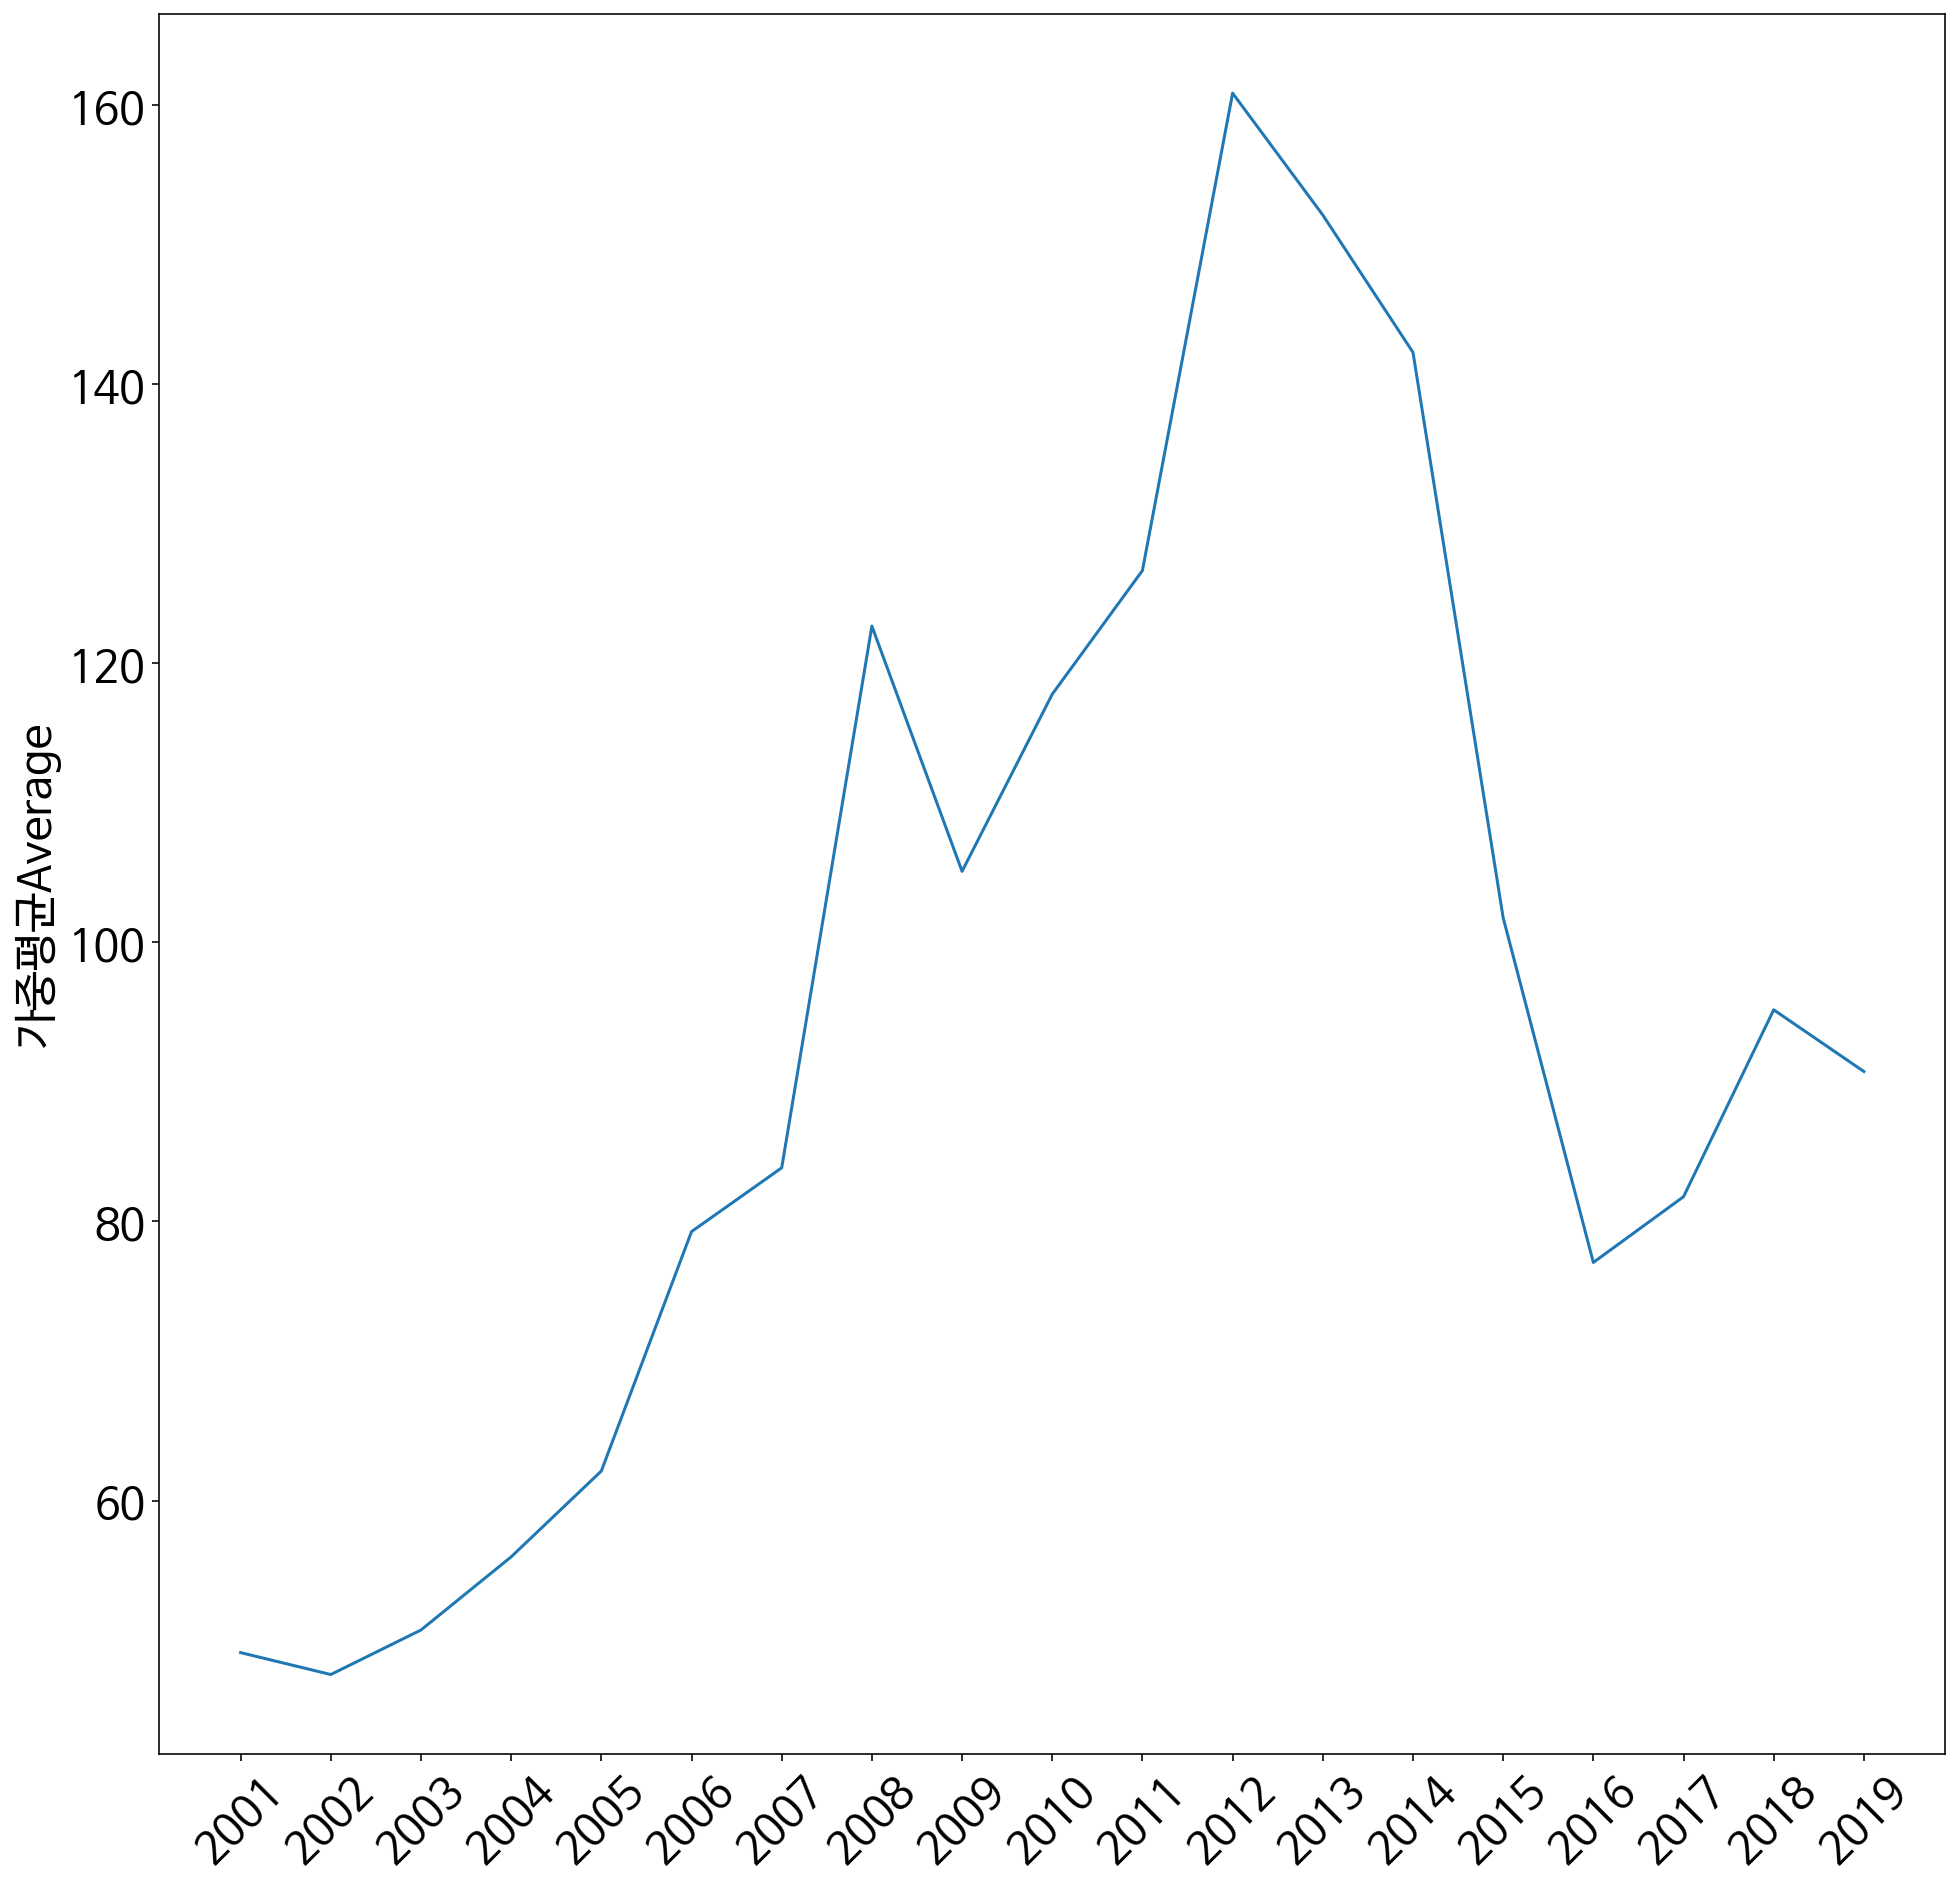

In [11]:
plt.figure(figsize=(16, 16))
plt.xticks(rotation=45)
# plt.style.use("ggplot")
ax=sns.lineplot(data=yearly_SMP["가중평균Average"])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

In [12]:
unit_price=pd.read_csv(os.path.join(path, "csv_table", "39_연료별정상단가.csv"))

In [13]:
unit_price=unit_price.set_index('연도Term')
unit_price

,원자력Nuclear,석탄Coal,LNGLiquefied-Natural-Gas,유류Oil,양수Pumped-Storage,신재생Renewable,기타Others,평균Average,증감률Change
연도Term,,,,,,,,,
2001,39.65,41.39,87.77,73.37,75.06,57.32,-,47.85,-
2002,39.55,42.37,75.60,70.94,83.58,54.22,-,47.14,-1.5
2003,39.75,42.16,82.92,76.03,94.08,56.70,-,48.64,3.2
2004,39.52,41.86,77.91,81.33,108.20,61.19,-,49.20,1.2
2005,39.10,43.54,87.07,92.50,108.28,69.56,-,50.96,3.6
2006,38.13,38.43,102.95,116.43,136.80,83.57,-,53.30,4.6
2007,39.40,40.93,104.93,118.30,163.31,91.16,-,56.51,6.0
2008,39.02,51.15,143.72,194.43,196.78,132.22,-,68.31,20.9
2009,35.56,60.23,129.51,147.24,149.70,107.04,-,66.34,-2.9


In [14]:
unit_price.iloc[:, :6]

,원자력Nuclear,석탄Coal,LNGLiquefied-Natural-Gas,유류Oil,양수Pumped-Storage,신재생Renewable
연도Term,,,,,,
2001,39.65,41.39,87.77,73.37,75.06,57.32
2002,39.55,42.37,75.60,70.94,83.58,54.22
2003,39.75,42.16,82.92,76.03,94.08,56.70
2004,39.52,41.86,77.91,81.33,108.20,61.19
2005,39.10,43.54,87.07,92.50,108.28,69.56
2006,38.13,38.43,102.95,116.43,136.80,83.57
2007,39.40,40.93,104.93,118.30,163.31,91.16
2008,39.02,51.15,143.72,194.43,196.78,132.22
2009,35.56,60.23,129.51,147.24,149.70,107.04


/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

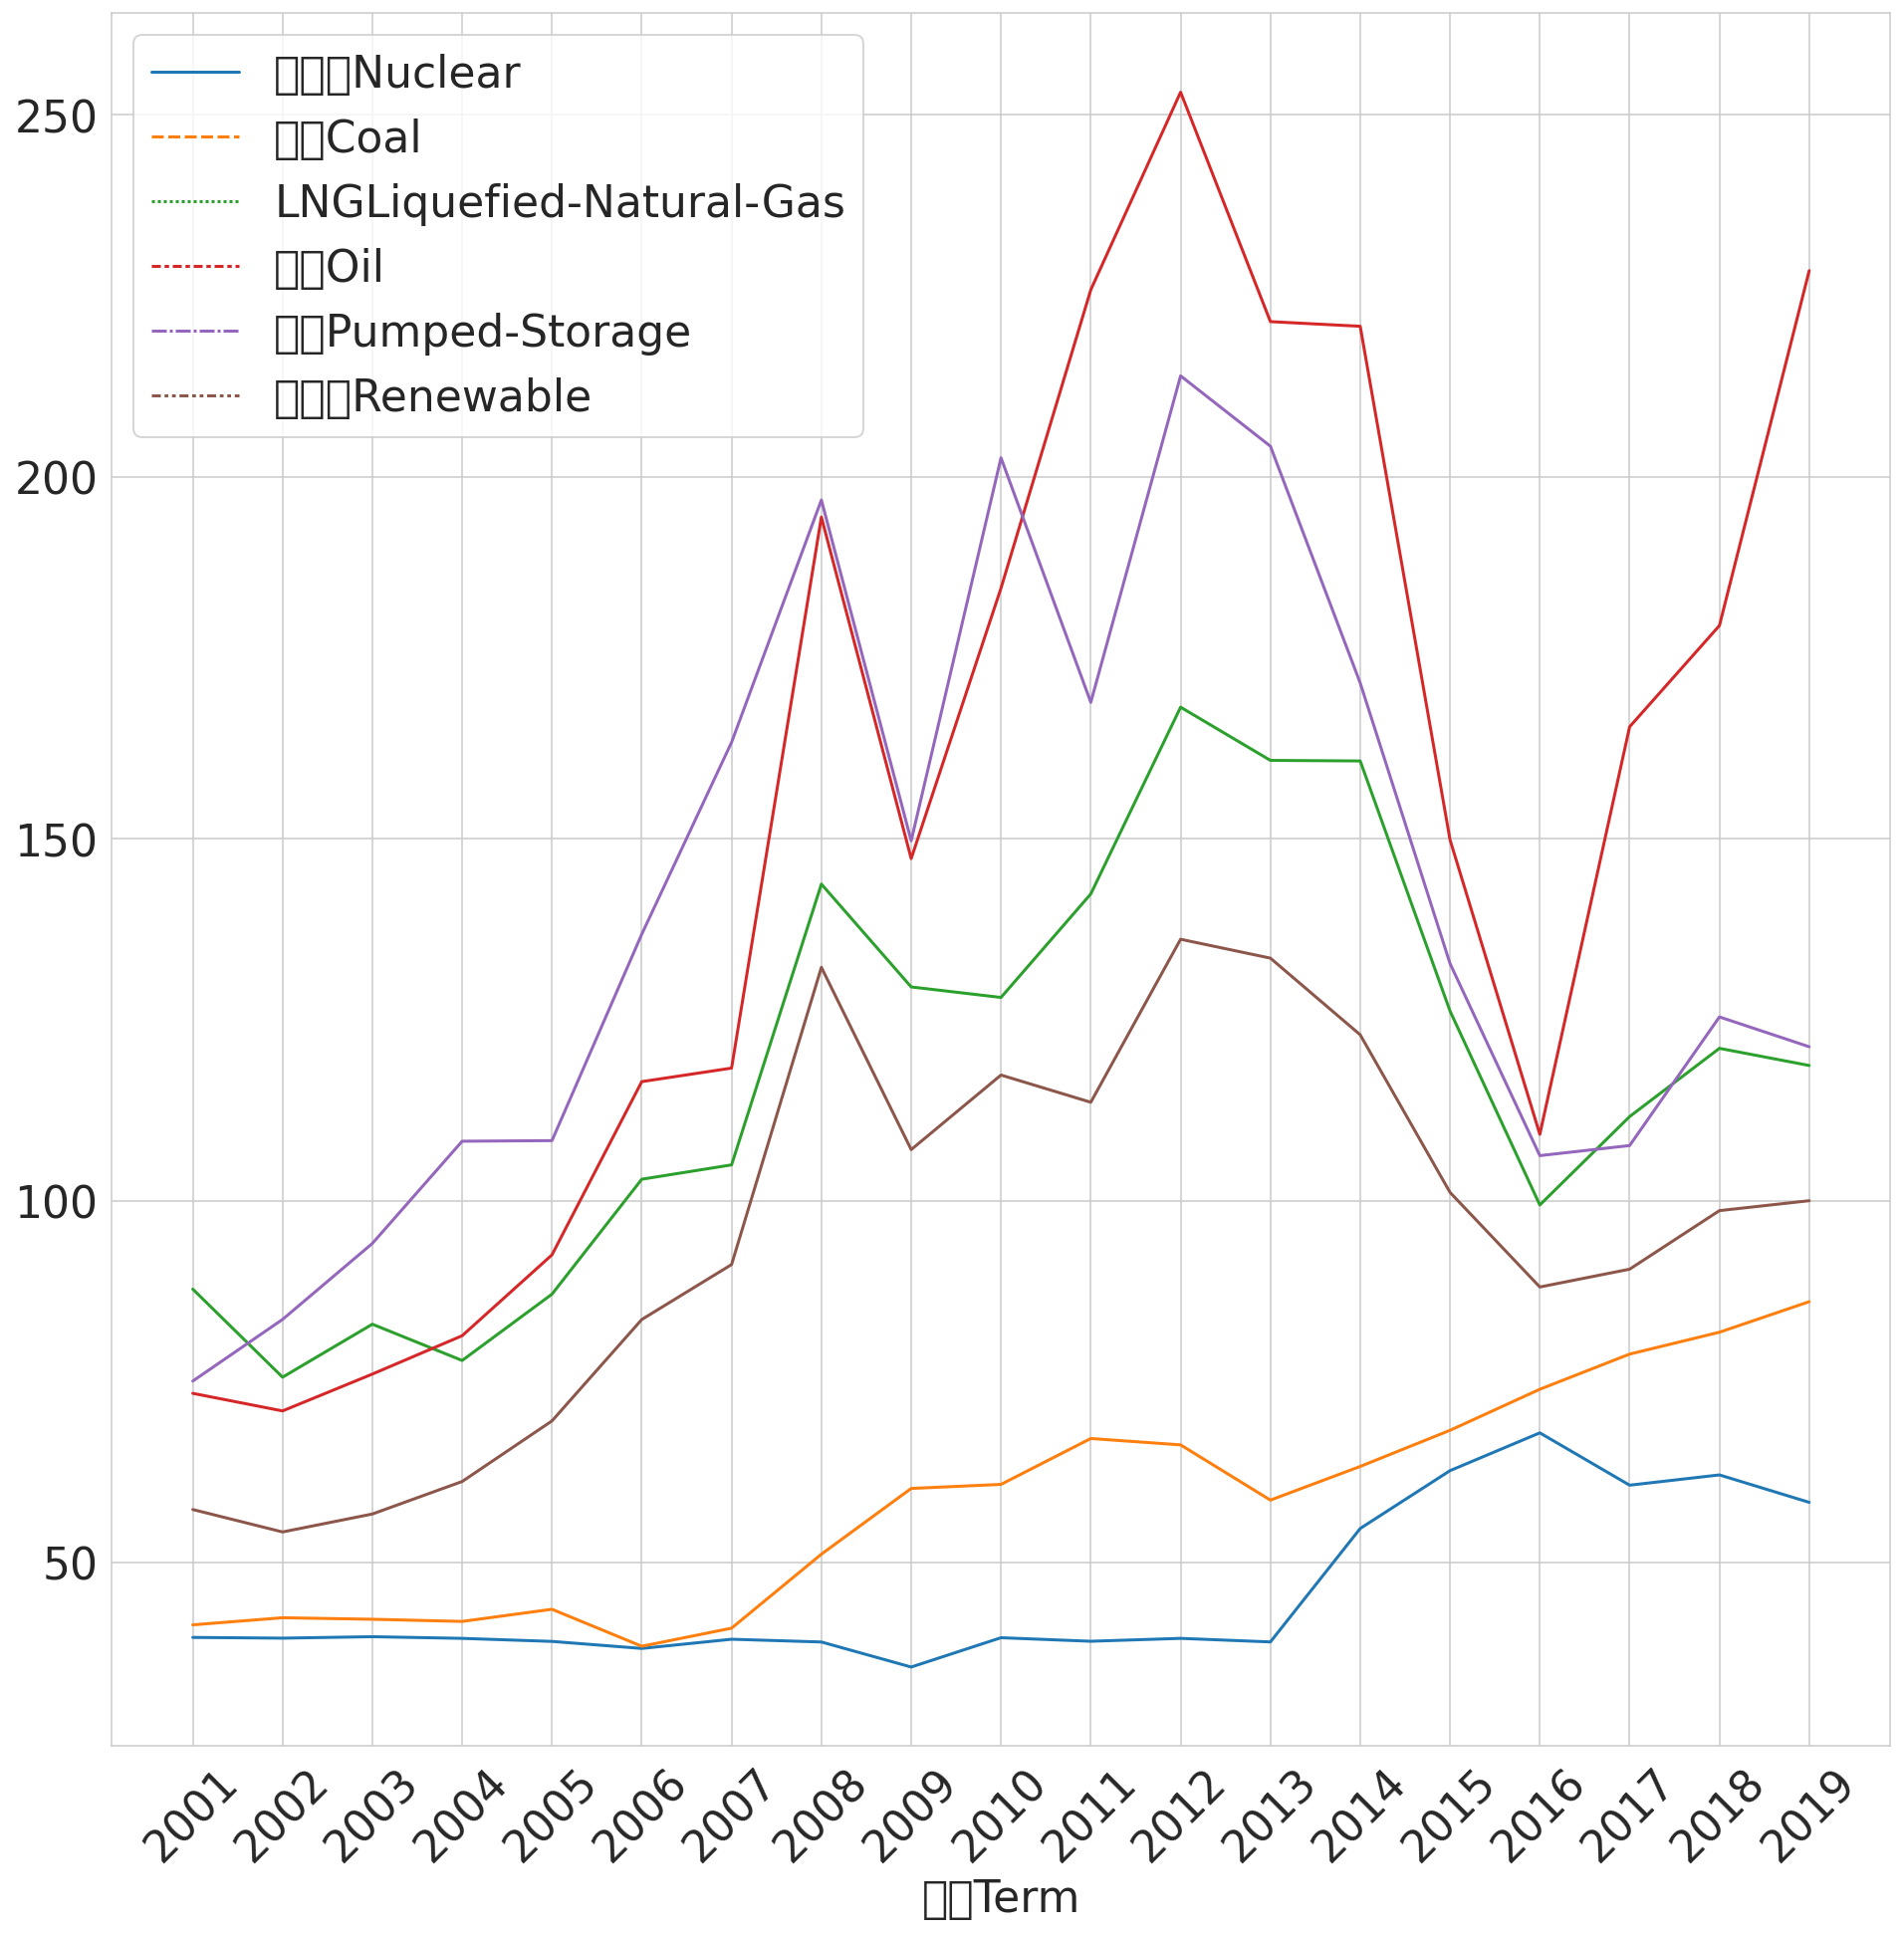

In [16]:
plt.figure(figsize=(16, 16))
plt.xticks(rotation=45)
sns.set_style("whitegrid")
ax=sns.lineplot(data=unit_price.iloc[:, :6])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for l in ax.lines:
  l.set_linestyle("-")
plt.show()

In [17]:
integrated_year_price=pd.concat([yearly_SMP["가중평균Average"], unit_price.iloc[:, :3], unit_price.iloc[:, 5:6]], axis=1)

In [18]:
integrated_year_price

,가중평균Average,원자력Nuclear,석탄Coal,LNGLiquefied-Natural-Gas,신재생Renewable
2001,49.11,39.65,41.39,87.77,57.32
2002,47.54,39.55,42.37,75.60,54.22
2003,50.73,39.75,42.16,82.92,56.70
2004,55.97,39.52,41.86,77.91,61.19
2005,62.12,39.10,43.54,87.07,69.56
2006,79.27,38.13,38.43,102.95,83.57
2007,83.84,39.40,40.93,104.93,91.16
2008,122.65,39.02,51.15,143.72,132.22
2009,105.08,35.56,60.23,129.51,107.04
2010,117.77,39.61,60.79,128.06,117.34


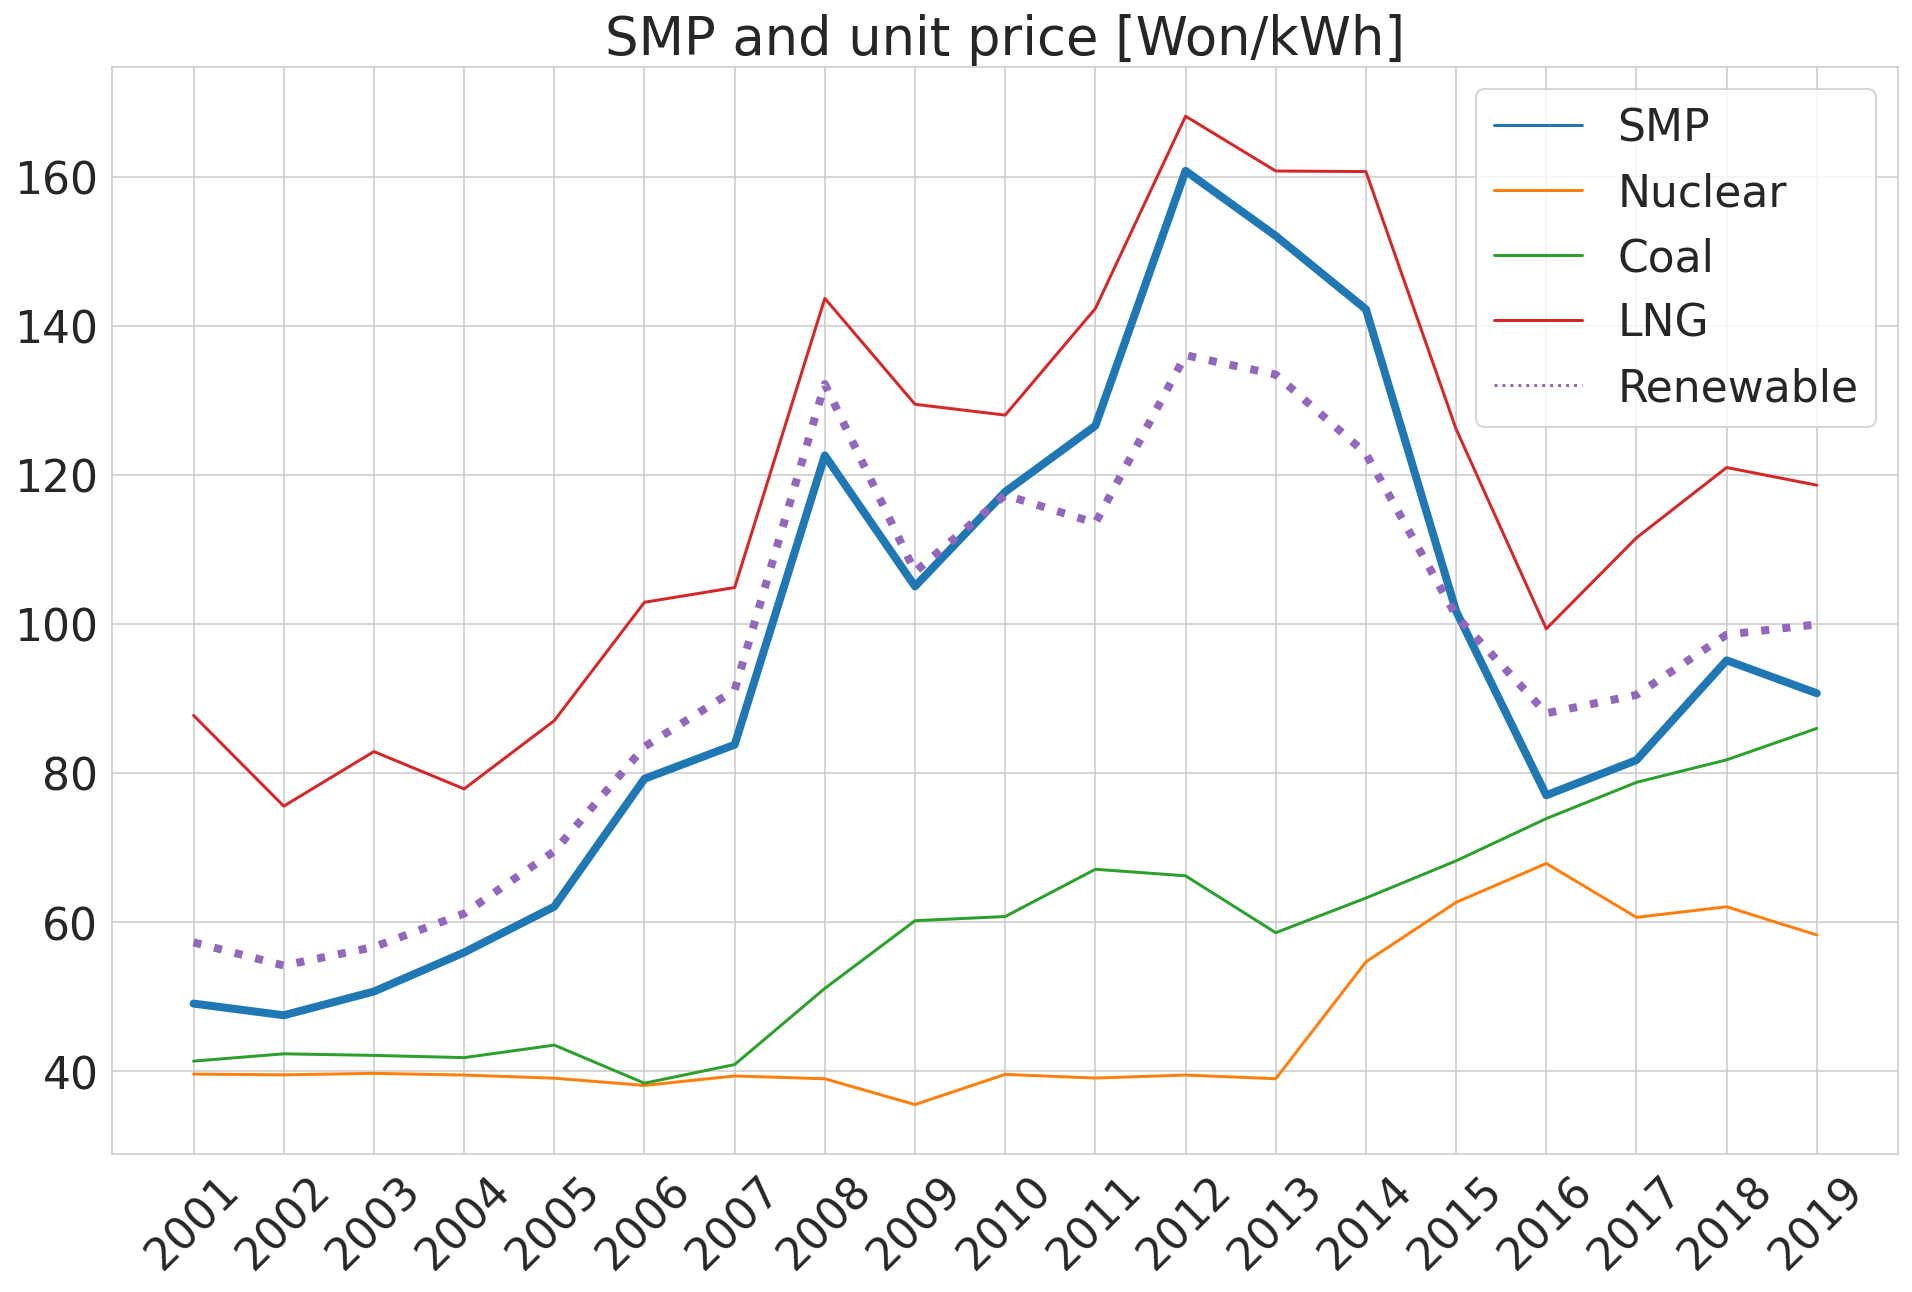

In [20]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.xticks(rotation=45)
ax=sns.lineplot(data=integrated_year_price)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for idx, l in enumerate(ax.lines):
  l.set_linestyle("-")
  if idx == 4:
    l.set_linestyle(":")
ax.set_title("SMP and unit price [Won/kWh]")
ax.legend(["SMP", "Nuclear", "Coal", "LNG", "Renewable"])
ax.lines[0].set_linewidth(4)
ax.lines[4].set_linewidth(4)
plt.show()

진한 파랑 라인이 SMP(시장가)이고, 나머지 line이 생산자들에게 제공한 가격이다.<br>
coal, nuclear가 가장 저렴, renuewable energy source가 비싼 편<br>
39, 40페이지에서 가져옴


In [21]:
SMP_2019=pd.read_csv(os.path.join(path, "csv_table", "48_2019SMP.csv"))

In [23]:
Trading_2019=pd.read_csv(os.path.join(path, "csv_table", "48_거래량_거래금액.csv"))

In [24]:
SMP_2019

,2019년,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,평균
통합SMP,111.28,105.85,112.42,99.44,79.65,78.54,79.76,84.83,79.64,88.21,81.83,84.18,90.74,NaN


In [25]:
Trading_2019

,2019년,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
TradingVolume,50188,42100,44486,41429,41486,41146,46801,48472,41776,41571,42572,47824,529852,NaN
PaymentofSettlement,57787,45528,45488,36932,34375,31689,48253,46081,34128,34215,37988,46933,499398,NaN


In [26]:
col=list(SMP_2019.columns)[1:]
col.append("_")
SMP_2019.columns=col
SMP_2019=SMP_2019.drop(columns=["_"])
SMP_2019

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,평균
통합SMP,111.28,105.85,112.42,99.44,79.65,78.54,79.76,84.83,79.64,88.21,81.83,84.18,90.74


In [27]:
col=list(Trading_2019.columns)[1:]
col.append("_")
Trading_2019.columns=col
Trading_2019=Trading_2019.drop(columns=["_"])
Trading_2019

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
TradingVolume,50188,42100,44486,41429,41486,41146,46801,48472,41776,41571,42572,47824,529852
PaymentofSettlement,57787,45528,45488,36932,34375,31689,48253,46081,34128,34215,37988,46933,499398


TradingVolume: GWh(Gigawatt)
<br>PaymentofSettlement: 억원

In [28]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
fm._rebuild()

In [29]:
# plt.rc('font', family='NanumGothicCoding')
print (plt.rcParams['font.family'] )

['sans-serif']


/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


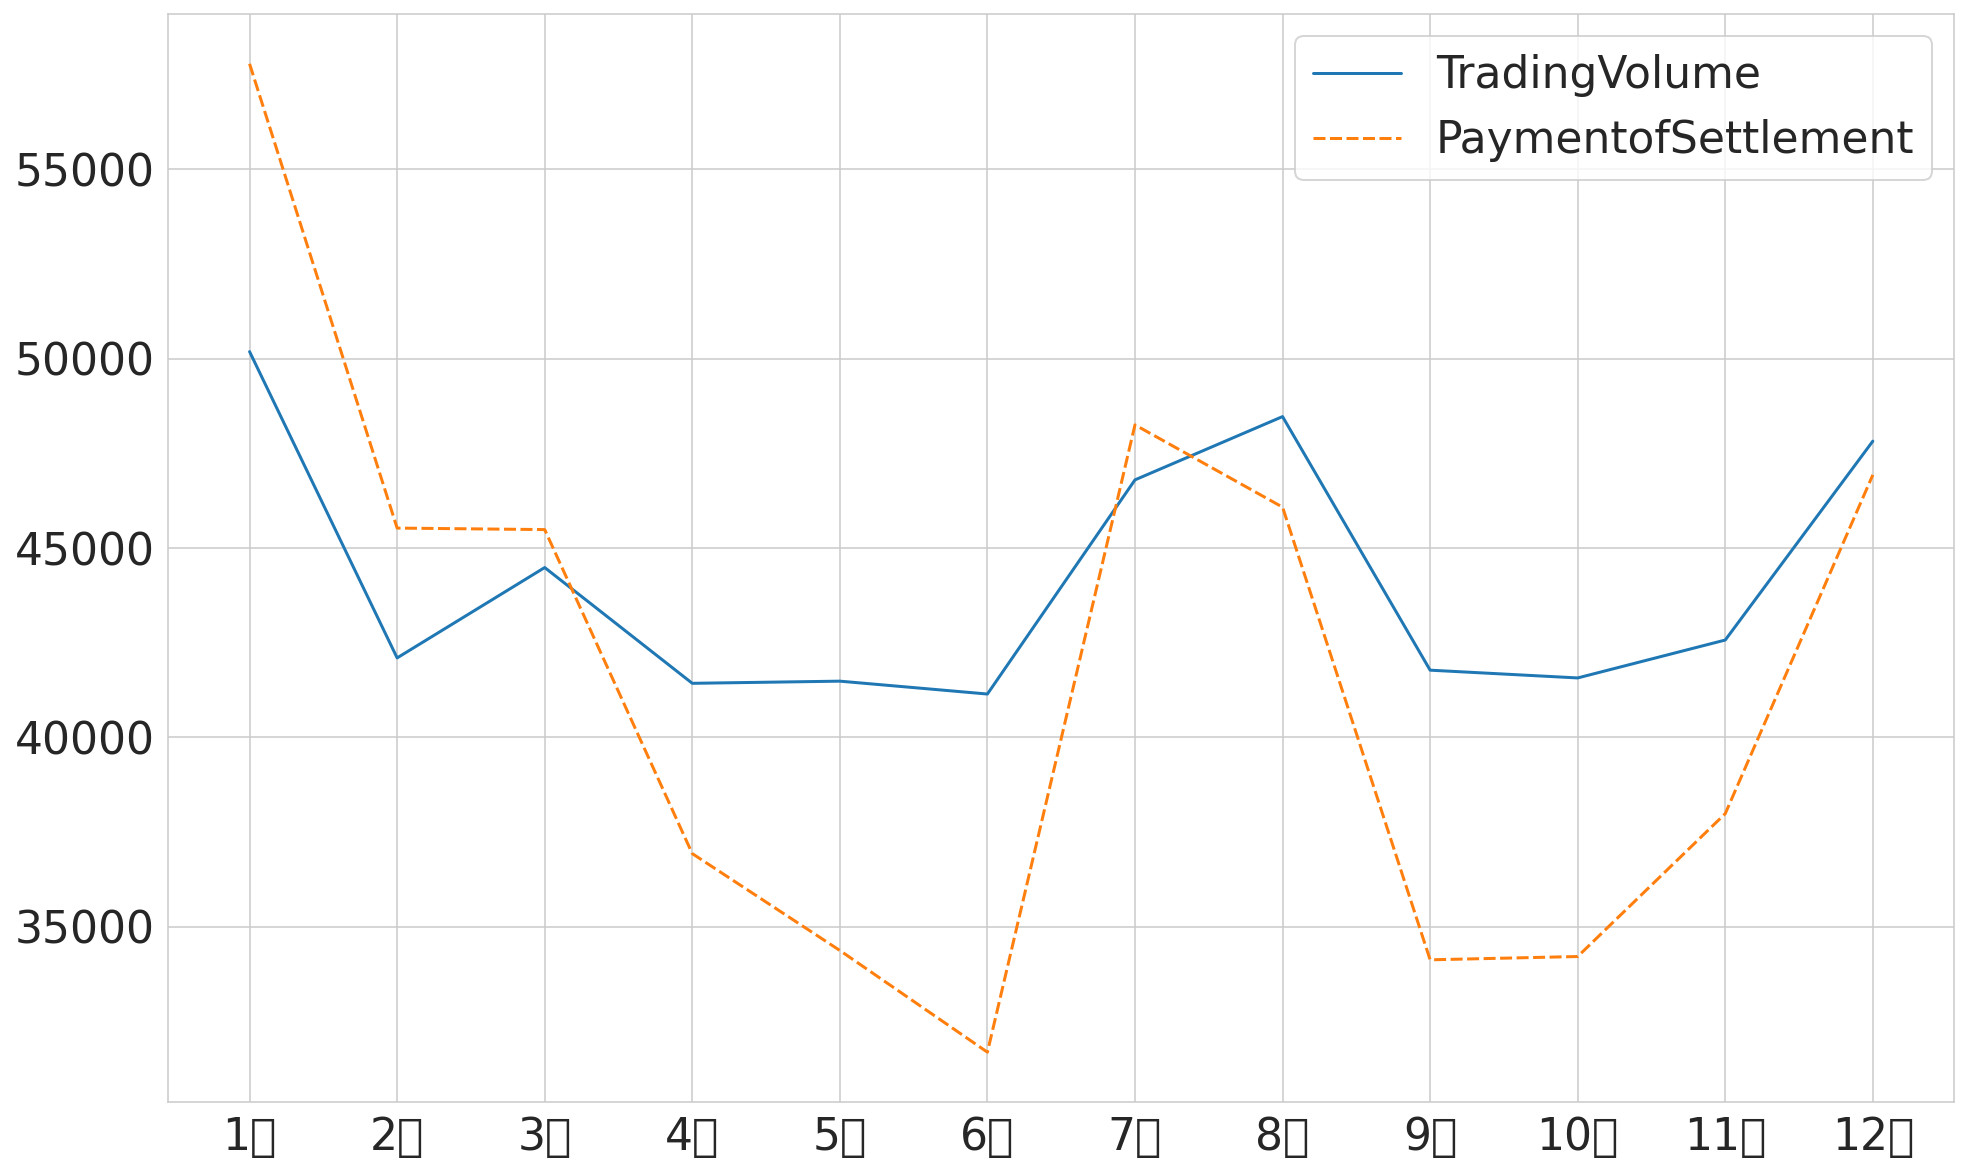

In [30]:
plt.rc('font', family='NanumGothicCoding')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=Trading_2019.iloc[:, :-1].T)

/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.

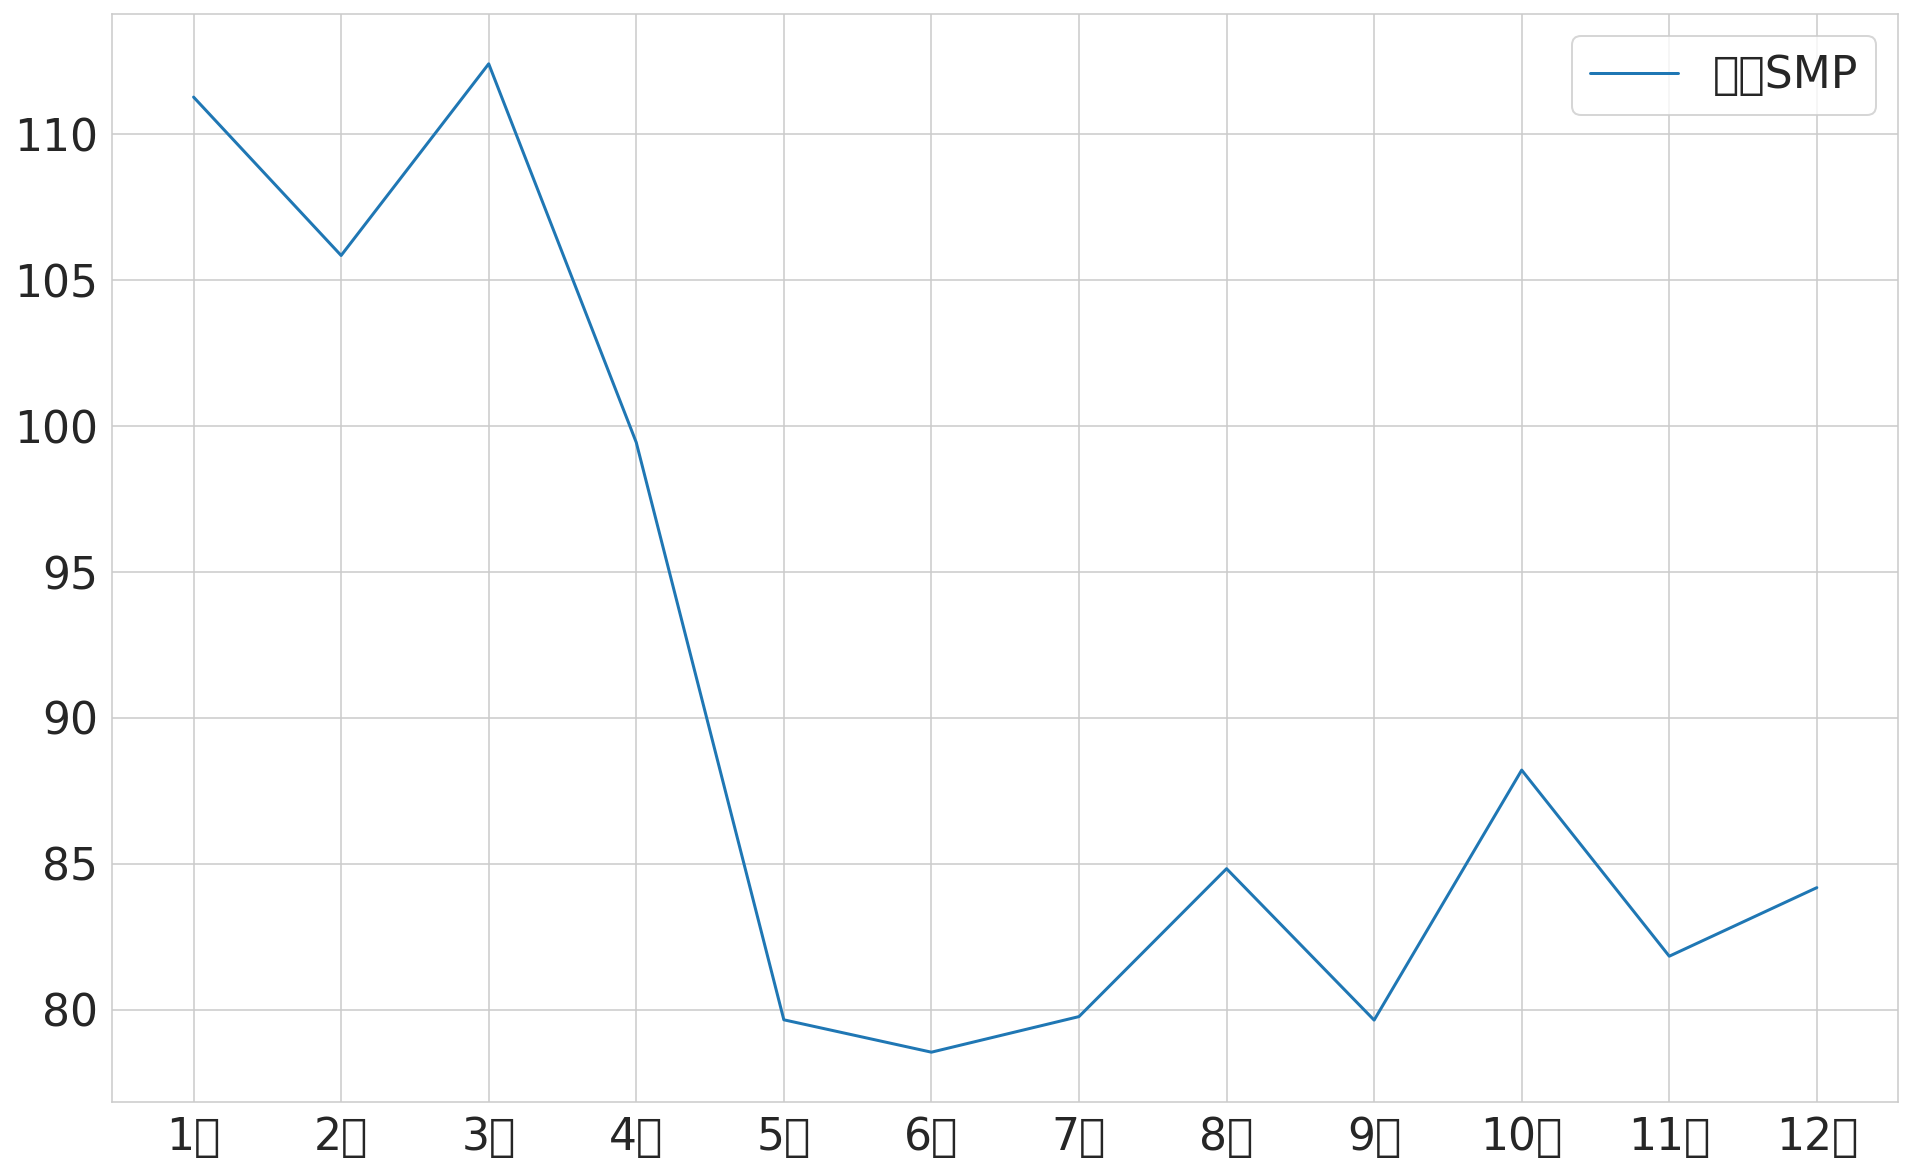

In [31]:
SMP_2019
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=SMP_2019.iloc[:, :-1].T)

In [36]:
AMGO_list=glob(path+"csv_table/*거래.csv")

In [37]:
AMGO_list=sorted(AMGO_list)

In [38]:
AMGO_list

['/home/dhk1349/Desktop/전력시장통계/csv_table/50_2019_통합거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/52_2019_1_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/54_2019_2_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/56_2019_3_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/58_2019_4_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/60_2019_5_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/62_2019_6_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/64_2019_7_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/66_2019_8_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/68_2019_9_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/70_2019_10_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/72_2019_11_거래.csv',
 '/home/dhk1349/Desktop/전력시장통계/csv_table/74_2019_12_거래.csv']

In [39]:
month_dict={}
for m in AMGO_list:
  print(m.split("/")[-1][8:10])
  month_dict[m.split("/")[-1][8:10]]=pd.read_csv(m)
  month_dict[m.split("/")[-1][8:10]]=month_dict[m.split("/")[-1][8:10]].drop([7, 14, 17 ])

통합
1_
2_
3_
4_
5_
6_
7_
8_
9_
10
11
12


In [40]:
month_dict["1_"]

,연료원FuelType,가격결정발전계획량PSE,제약발전량CON_Q,제약비발전량COFF_Q,시장참여설비용량Capacity,초기입찰량A,변경입찰량RA,조정입찰량ARA,발전계량값MGO,전력거래량AMGO
0,원자력Nuclear,11701,5,-,21850,11702,11668,11668,11663,11663
1,유연탄FlamingCoal,22202,41,1811,36856,22202,21973,21965,21053,21053
2,무연탄Anthracite,270,-,21,600,270,269,269,248,248
3,LNGLiquefiedNaturalGas,13188,4209,3184,36961,28937,28660,28642,14053,14053
4,유류Oil,168,495,45,4122,2952,2944,2944,628,628
5,양수PumpedStorage,-0,339,-,4700,1,1,1,340,340
6,연료전지FuelCell,-,-,-,345,-,-,-,184,184
8,태양광Photovoltaic,-,-,-,2689,-,-,-,253,253
9,풍력WindPower,-,-,-,1421,-,-,-,346,346
10,수력Hydro,163,2,-,1789,163,162,162,200,200


In [44]:
AMGO_concat= pd.DataFrame()
for pd_key in month_dict.keys():
  if pd_key!="통합":
    AMGO_concat=pd.concat([AMGO_concat, month_dict[pd_key]["전력거래량AMGO"]], axis=1)

In [45]:
list(month_dict["1_"]["연료원FuelType"])

['원자력Nuclear',
 '유연탄FlamingCoal',
 '무연탄Anthracite',
 'LNGLiquefiedNaturalGas',
 '유류Oil',
 '양수PumpedStorage',
 '연료전지FuelCell',
 '태양광Photovoltaic',
 '풍력WindPower',
 '수력Hydro',
 '해양에너지Ocean',
 '바이오가스Biogas',
 '매립가스LandFillGas',
 '바이오기타Bioetc.',
 '부생가스Off-Gas',
 '폐기물Waste',
 '기타Others',
 '총계Total']

In [46]:
AMGO_concat.columns=[i for i in range(1, 13)]

In [47]:
AMGO_concat

,1,2,3,4,5,6,7,8,9,10,11,12
0,11663,10501,13369,13471,14051,12934,11110,11597,9803,10071,9724,10514
1,21053,17596,15771,13750,14203,16438,20811,21400,19624,18723,17947,17965
2,248,218,211,177,158,204,247,243,164,122,154,188
3,14053,11165,11696,11293,10167,8997,11751,12083,9623,9856,12203,16014
4,628,385,824,226,188,195,237,258,100,191,153,631
5,340,298,274,284,257,222,306,313,299,290,266,300
6,184,169,186,180,185,169,180,184,195,199,189,208
8,253,261,348,336,445,374,320,375,285,334,278,241
9,346,245,287,179,223,102,187,146,134,227,254,341
10,200,169,173,241,278,254,256,281,261,250,181,195


In [48]:
AMGO_concat=AMGO_concat.reset_index()
AMGO_concat=AMGO_concat.drop(columns=["index"])

In [49]:
AMGO_concat['Type']=list(month_dict["1_"]["연료원FuelType"])
AMGO_concat


,1,2,3,4,5,6,7,8,9,10,11,12,Type
0,11663,10501,13369,13471,14051,12934,11110,11597,9803,10071,9724,10514,원자력Nuclear
1,21053,17596,15771,13750,14203,16438,20811,21400,19624,18723,17947,17965,유연탄FlamingCoal
2,248,218,211,177,158,204,247,243,164,122,154,188,무연탄Anthracite
3,14053,11165,11696,11293,10167,8997,11751,12083,9623,9856,12203,16014,LNGLiquefiedNaturalGas
4,628,385,824,226,188,195,237,258,100,191,153,631,유류Oil
5,340,298,274,284,257,222,306,313,299,290,266,300,양수PumpedStorage
6,184,169,186,180,185,169,180,184,195,199,189,208,연료전지FuelCell
7,253,261,348,336,445,374,320,375,285,334,278,241,태양광Photovoltaic
8,346,245,287,179,223,102,187,146,134,227,254,341,풍력WindPower
9,200,169,173,241,278,254,256,281,261,250,181,195,수력Hydro


In [50]:
AMGO_concat=AMGO_concat.set_index('Type')
AMGO_concat

,1,2,3,4,5,6,7,8,9,10,11,12
Type,,,,,,,,,,,,
원자력Nuclear,11663,10501,13369,13471,14051,12934,11110,11597,9803,10071,9724,10514
유연탄FlamingCoal,21053,17596,15771,13750,14203,16438,20811,21400,19624,18723,17947,17965
무연탄Anthracite,248,218,211,177,158,204,247,243,164,122,154,188
LNGLiquefiedNaturalGas,14053,11165,11696,11293,10167,8997,11751,12083,9623,9856,12203,16014
유류Oil,628,385,824,226,188,195,237,258,100,191,153,631
양수PumpedStorage,340,298,274,284,257,222,306,313,299,290,266,300
연료전지FuelCell,184,169,186,180,185,169,180,184,195,199,189,208
태양광Photovoltaic,253,261,348,336,445,374,320,375,285,334,278,241
풍력WindPower,346,245,287,179,223,102,187,146,134,227,254,341


In [51]:
# AMGO_concat=AMGO_concat.drop(columns=["level_0"])
T_AMGO=AMGO_concat.T.squeeze()

In [52]:
T_AMGO

Type,원자력Nuclear,유연탄FlamingCoal,무연탄Anthracite,LNGLiquefiedNaturalGas,유류Oil,양수PumpedStorage,연료전지FuelCell,태양광Photovoltaic,풍력WindPower,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오기타Bioetc.,부생가스Off-Gas,폐기물Waste,기타Others,총계Total
1,11663,21053,248,14053,628,340,184,253,346,200,39,37,25,209,817,51,43,50188
2,10501,17596,218,11165,385,298,169,261,245,169,39,19,15,169,762,49,38,42100
3,13369,15771,211,11696,824,274,186,348,287,173,40,34,24,216,894,64,35,44486
4,13471,13750,177,11293,226,284,180,336,179,241,39,37,22,206,813,56,42,41429
5,14051,14203,158,10167,188,257,185,445,223,278,39,36,13,153,841,71,41,41486
6,12934,16438,204,8997,195,222,169,374,102,254,37,36,16,214,712,72,42,41146
7,11110,20811,247,11751,237,306,180,320,187,256,38,29,20,204,864,74,35,46801
8,11597,21400,243,12083,258,313,184,375,146,281,42,17,21,199,879,60,47,48472
9,9803,19624,164,9623,100,299,195,285,134,261,42,31,16,205,563,65,44,41776
10,10071,18723,122,9856,191,290,199,334,227,250,43,38,22,200,607,75,50,41571


In [53]:
T_AMGO=T_AMGO.astype('int32')
T_AMGO

Type,원자력Nuclear,유연탄FlamingCoal,무연탄Anthracite,LNGLiquefiedNaturalGas,유류Oil,양수PumpedStorage,연료전지FuelCell,태양광Photovoltaic,풍력WindPower,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오기타Bioetc.,부생가스Off-Gas,폐기물Waste,기타Others,총계Total
1,11663,21053,248,14053,628,340,184,253,346,200,39,37,25,209,817,51,43,50188
2,10501,17596,218,11165,385,298,169,261,245,169,39,19,15,169,762,49,38,42100
3,13369,15771,211,11696,824,274,186,348,287,173,40,34,24,216,894,64,35,44486
4,13471,13750,177,11293,226,284,180,336,179,241,39,37,22,206,813,56,42,41429
5,14051,14203,158,10167,188,257,185,445,223,278,39,36,13,153,841,71,41,41486
6,12934,16438,204,8997,195,222,169,374,102,254,37,36,16,214,712,72,42,41146
7,11110,20811,247,11751,237,306,180,320,187,256,38,29,20,204,864,74,35,46801
8,11597,21400,243,12083,258,313,184,375,146,281,42,17,21,199,879,60,47,48472
9,9803,19624,164,9623,100,299,195,285,134,261,42,31,16,205,563,65,44,41776
10,10071,18723,122,9856,191,290,199,334,227,250,43,38,22,200,607,75,50,41571


In [54]:
#AMGO_concat.iloc[:1, :]
type(AMGO_concat.iloc[:1, :].squeeze())

pandas.core.series.Series

In [55]:
type(month_dict["1_"]['전력거래량AMGO'])

pandas.core.series.Series

# 왜인지는 모르겠는데 이 아래 cell이 안됨
# 이걸로는 거래량이랑 예상 수요랑 비교해야함
# df의 elem들이 string type이라서 그랬던 것.

/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

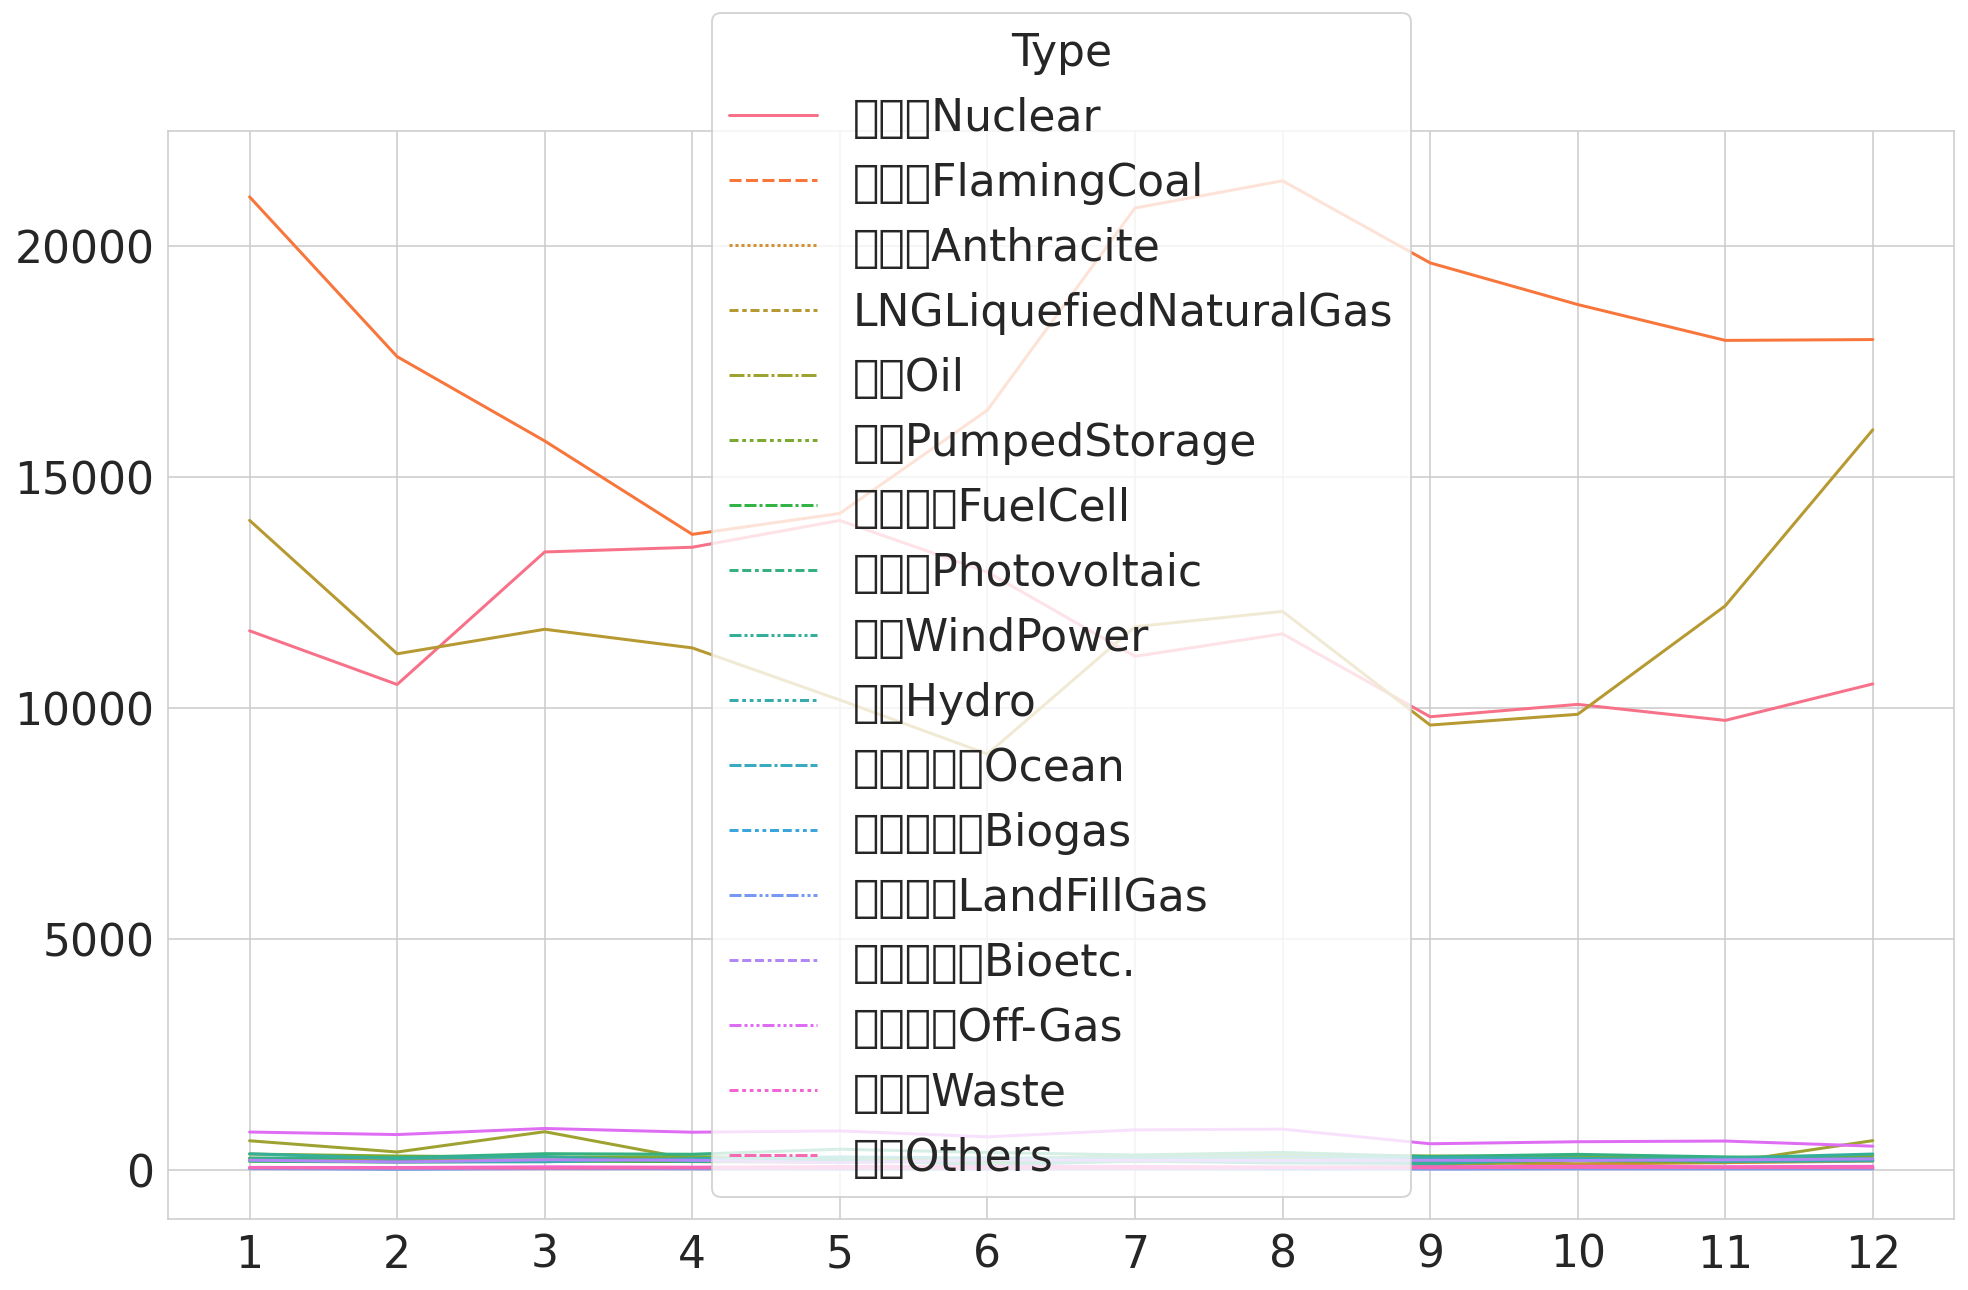

In [57]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=T_AMGO.iloc[:, :-1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for idx, l in enumerate(ax.lines):
  l.set_linestyle("-")
  #if idx == 4:
  #  l.set_linestyle(":")
#ax.set_title("SMP and unit price [Won/kWh]")
#ax.legend(["SMP", "Nuclear", "Coal", "LNG", "Renewable"])
#ax.lines[0].set_linewidth(4)
#ax.lines[4].set_linewidth(4)
plt.show()

In [58]:
T_AMGO

Type,원자력Nuclear,유연탄FlamingCoal,무연탄Anthracite,LNGLiquefiedNaturalGas,유류Oil,양수PumpedStorage,연료전지FuelCell,태양광Photovoltaic,풍력WindPower,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오기타Bioetc.,부생가스Off-Gas,폐기물Waste,기타Others,총계Total
1,11663,21053,248,14053,628,340,184,253,346,200,39,37,25,209,817,51,43,50188
2,10501,17596,218,11165,385,298,169,261,245,169,39,19,15,169,762,49,38,42100
3,13369,15771,211,11696,824,274,186,348,287,173,40,34,24,216,894,64,35,44486
4,13471,13750,177,11293,226,284,180,336,179,241,39,37,22,206,813,56,42,41429
5,14051,14203,158,10167,188,257,185,445,223,278,39,36,13,153,841,71,41,41486
6,12934,16438,204,8997,195,222,169,374,102,254,37,36,16,214,712,72,42,41146
7,11110,20811,247,11751,237,306,180,320,187,256,38,29,20,204,864,74,35,46801
8,11597,21400,243,12083,258,313,184,375,146,281,42,17,21,199,879,60,47,48472
9,9803,19624,164,9623,100,299,195,285,134,261,42,31,16,205,563,65,44,41776
10,10071,18723,122,9856,191,290,199,334,227,250,43,38,22,200,607,75,50,41571


/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

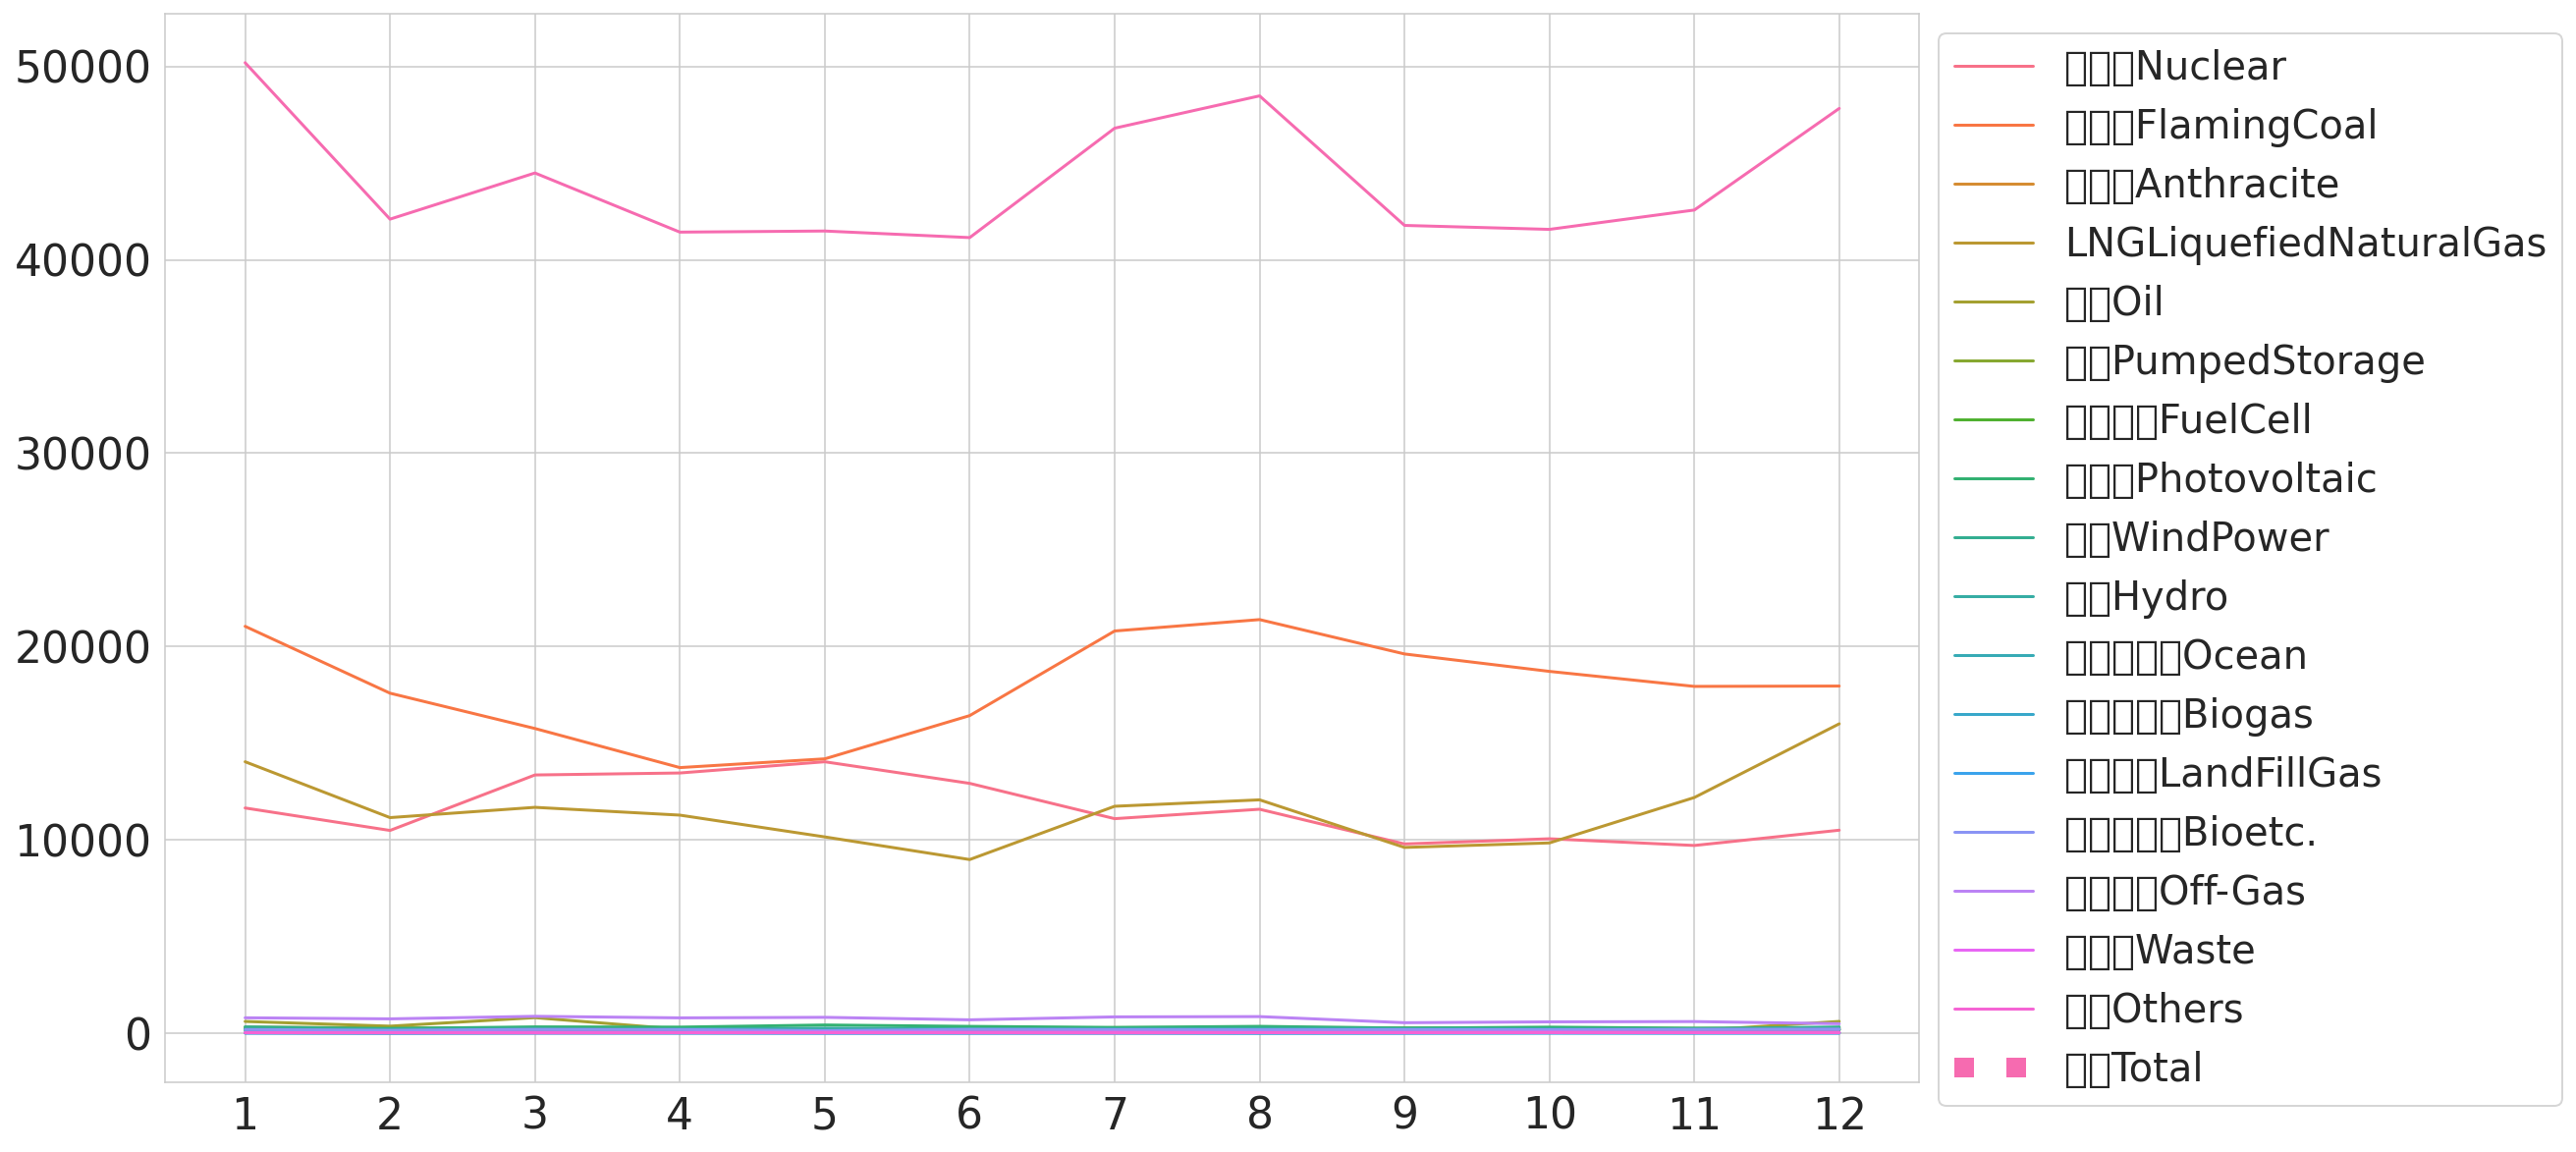

In [77]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=T_AMGO)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for idx, l in enumerate(ax.lines):
  l.set_linestyle("-")
  if idx == len(ax.lines)-1:
    l.set_linestyle(":")
    l.set_linewidth(10)
#ax.set_title("SMP and unit price [Won/kWh]")
#ax.legend(["SMP", "Nuclear", "Coal", "LNG", "Renewable"])
#ax.lines[0].set_linewidth(4)
#ax.lines[4].set_linewidth(4)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize=15, loc=2, prop={'size': 20})
plt.show()

In [60]:
AMGO_concat.index[5:-1]

Index(['양수PumpedStorage', '연료전지FuelCell', '태양광Photovoltaic', '풍력WindPower',
       '수력Hydro', '해양에너지Ocean', '바이오가스Biogas', '매립가스LandFillGas',
       '바이오기타Bioetc.', '부생가스Off-Gas', '폐기물Waste', '기타Others'],
      dtype='object', name='Type')

In [61]:
newdf=T_AMGO[list(AMGO_concat.index)[5:-1]]
newdf

Type,양수PumpedStorage,연료전지FuelCell,태양광Photovoltaic,풍력WindPower,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오기타Bioetc.,부생가스Off-Gas,폐기물Waste,기타Others
1,340,184,253,346,200,39,37,25,209,817,51,43
2,298,169,261,245,169,39,19,15,169,762,49,38
3,274,186,348,287,173,40,34,24,216,894,64,35
4,284,180,336,179,241,39,37,22,206,813,56,42
5,257,185,445,223,278,39,36,13,153,841,71,41
6,222,169,374,102,254,37,36,16,214,712,72,42
7,306,180,320,187,256,38,29,20,204,864,74,35
8,313,184,375,146,281,42,17,21,199,879,60,47
9,299,195,285,134,261,42,31,16,205,563,65,44
10,290,199,334,227,250,43,38,22,200,607,75,50


/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

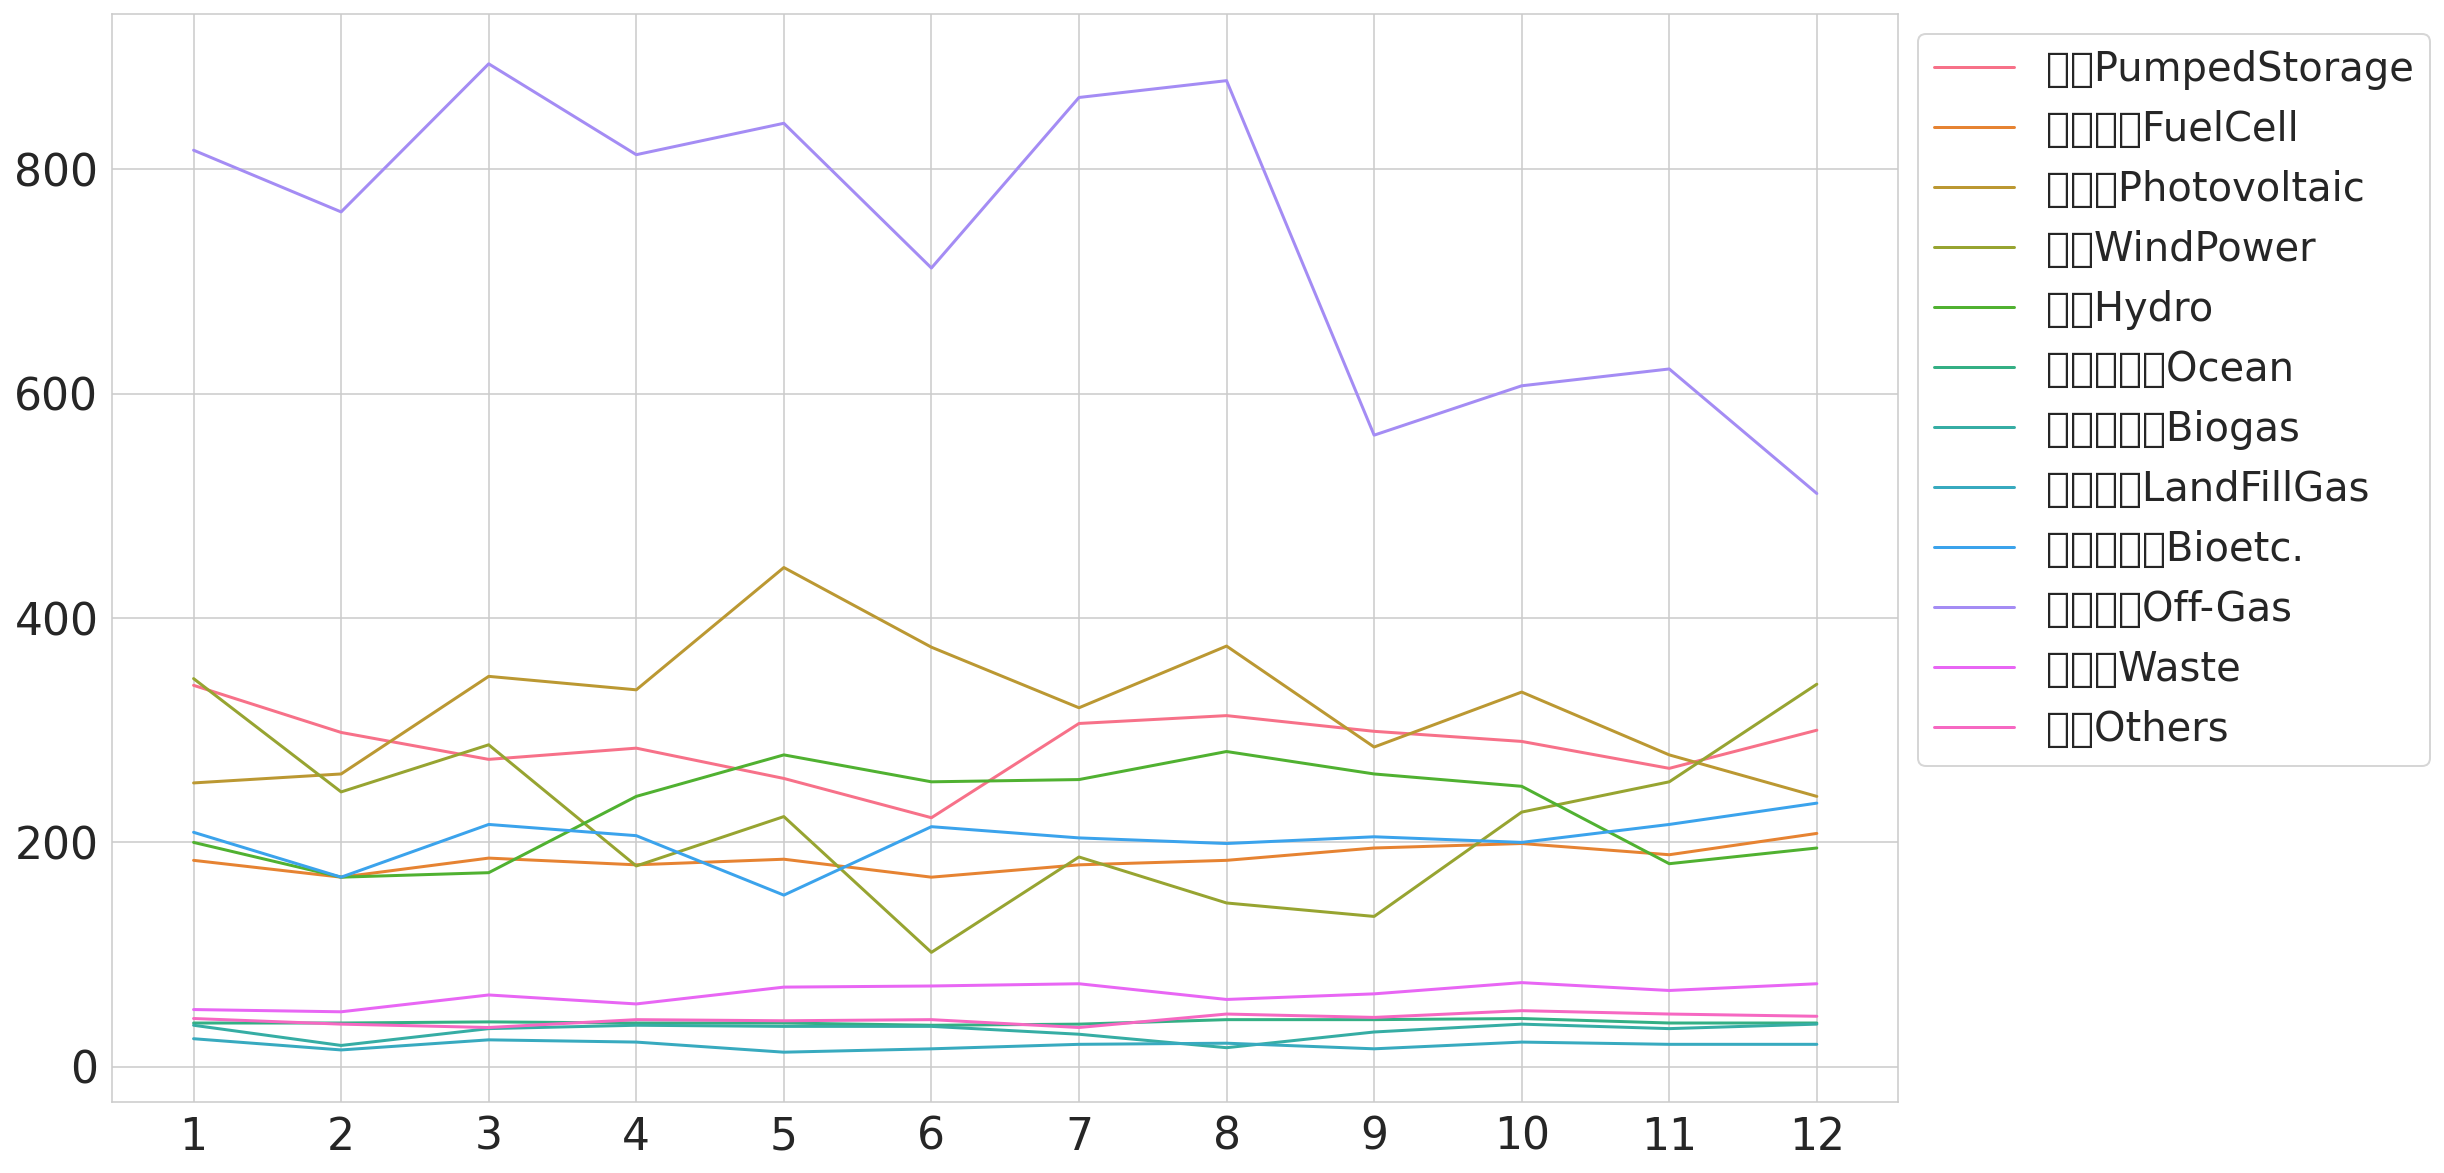

In [78]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=newdf)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for idx, l in enumerate(ax.lines):
  l.set_linestyle("-")
  #if idx == 4:
  #  l.set_linestyle(":")
#ax.set_title("SMP and unit price [Won/kWh]")
#ax.legend(["SMP", "Nuclear", "Coal", "LNG", "Renewable"])
#ax.lines[0].set_linewidth(4)
#ax.lines[4].set_linewidth(4)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize=15, loc=2, prop={'size': 20})

plt.show()

In [81]:
AMGO_2019=pd.read_csv(os.path.join(path, "csv_table", "50_2019_통합거래.csv"))
AMGO_2019=AMGO_2019.replace('-', 0)
AMGO_2019.iloc[:-1, :]# ["전력거래량AMGO"]

,연료원FuelType,가격결정발전계획량PSE,제약발전량CON_Q,제약비발전량COFF_Q,시장참여설비용량Capacity,초기입찰량A,변경입찰량RA,조정입찰량ARA,발전계량값MGO,전력거래량AMGO
0,원자력Nuclear,137474,155,0,23250,139418,138901,138900,138809,138809
1,유연탄FlamingCoal,234443,924,27213,36856,236067,233395,233360,215283,215282
2,무연탄Anthracite,2474,70,189,600,2579,2555,2555,2334,2334
3,LNGLiquefiedNaturalGas,118360,43939,22494,38875,305686,302157,302027,138903,138902
4,유류Oil,1863,2592,491,3479,29541,29280,29274,4017,4017
5,양수PumpedStorage,-24,3371,3,4700,93,85,85,3448,3448
6,연료전지FuelCell,0,0,0,480,0,0,0,2228,2228
7,IGCC,0,0,0,346,0,0,0,781,781
8,태양광Photovoltaic,0,0,0,3411,0,0,0,3851,3851
9,풍력WindPower,0,0,0,1562,0,0,0,2672,2672


In [82]:
AMGO_2019.iloc[:5, :]

,연료원FuelType,가격결정발전계획량PSE,제약발전량CON_Q,제약비발전량COFF_Q,시장참여설비용량Capacity,초기입찰량A,변경입찰량RA,조정입찰량ARA,발전계량값MGO,전력거래량AMGO
0,원자력Nuclear,137474,155,0,23250,139418,138901,138900,138809,138809
1,유연탄FlamingCoal,234443,924,27213,36856,236067,233395,233360,215283,215282
2,무연탄Anthracite,2474,70,189,600,2579,2555,2555,2334,2334
3,LNGLiquefiedNaturalGas,118360,43939,22494,38875,305686,302157,302027,138903,138902
4,유류Oil,1863,2592,491,3479,29541,29280,29274,4017,4017


In [83]:
sum(AMGO_2019.iloc[5:18, :]["전력거래량AMGO"].astype('int32'))

29218

In [84]:
pie=list(AMGO_2019.iloc[:5, :]["전력거래량AMGO"].astype('int32'))
pie.append(sum(AMGO_2019.iloc[5:18, :]["전력거래량AMGO"].astype('int32')))
pie

[138809, 215282, 2334, 138902, 4017, 29218]

In [85]:
pielabel=list(AMGO_2019.iloc[:5, :]["연료원FuelType"])
pielabel.append("renewableTotal")
pielabel

['원자력Nuclear',
 '유연탄FlamingCoal',
 '무연탄Anthracite',
 'LNGLiquefiedNaturalGas',
 '유류Oil',
 'renewableTotal']

<Figure size 2160x2160 with 0 Axes>

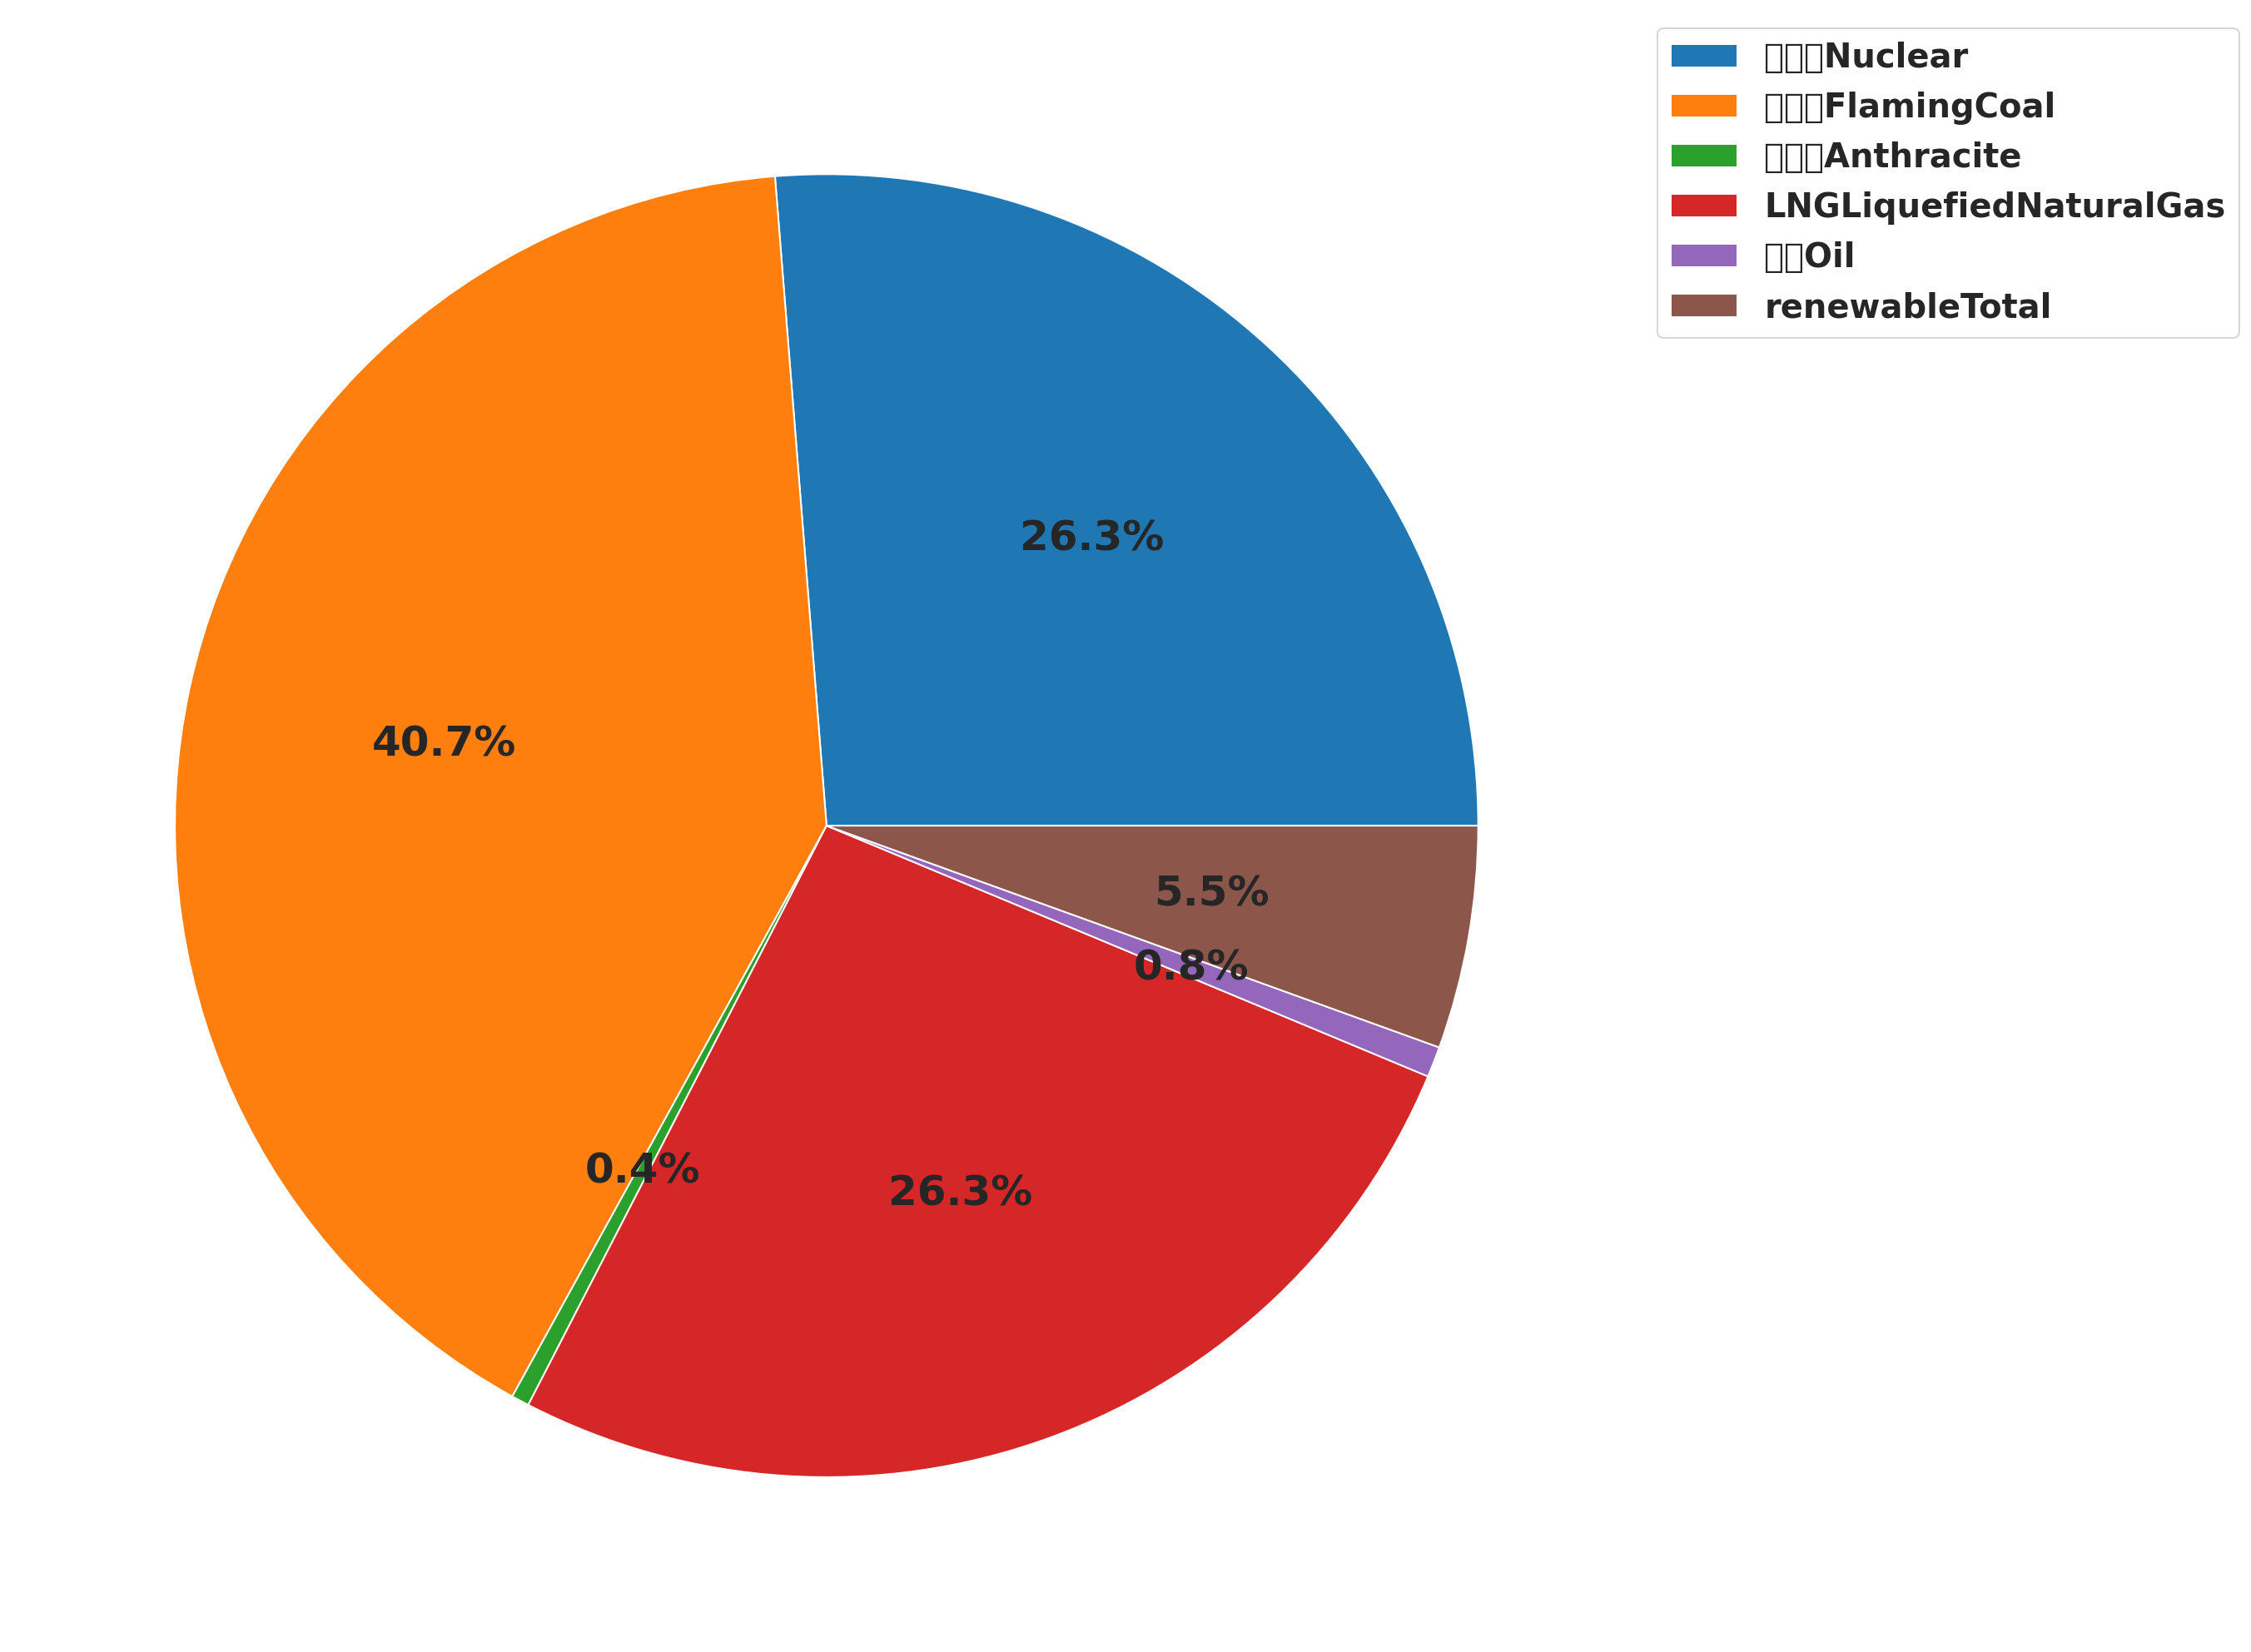

In [106]:
matplotlib.rcParams.update({'font.size': 25})
plt.rcParams["font.weight"] = "bold"
plt.rcParams['figure.figsize'] = [18, 18]
plt.figure(figsize=(30, 30))
fig1, ax1 = plt.subplots()
ax1.pie(pie, autopct='%1.1f%%')
plt.legend(labels=pielabel, bbox_to_anchor=(1.0, 1.0),fontsize=15,prop={'size': 20})
plt.show()

# 정산단가와 SMP비교

In [107]:
yearly_SMP['가중평균Average']

2001     49.11
2002     47.54
2003     50.73
2004     55.97
2005     62.12
2006     79.27
2007     83.84
2008    122.65
2009    105.08
2010    117.77
2011    126.63
2012    160.83
2013    152.10
2014    142.26
2015    101.76
2016     77.06
2017     81.77
2018     95.16
2019     90.74
Name: 가중평균Average, dtype: float64

In [109]:
UPS1=pd.read_csv(os.path.join(path, "csv_table", "108_신재생정산단가.csv"))
UPS2=pd.read_csv(os.path.join(path, "csv_table", "109_신재생정산단가.csv"))

In [110]:
UPS=UPS1.merge(UPS2, how='outer', on='연도Term')
UPS

,연도Term,연료전지FuelCell,IGCCIntegratedGasificationCombinedCycle,태양광Photovoltaic,풍력WindPower,부생가스Off-Gas,폐가스WasteGas,폐기물Waste,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오중유Bioheavyoil,바이오기타Bioetc.,신재생에너지합계RenewableEnergyTotal,증감률Change
0,2001,-,-,-,-,-,-,-,57.32,-,-,-,-,-,57.32,-
1,2002,-,-,-,-,-,-,-,54.22,-,-,-,-,-,54.22,-5.4
2,2003,-,-,-,51.67,54.73,-,49.52,57.43,-,-,47.85,-,-,56.70,4.6
3,2004,-,-,58.54,55.65,59.64,-,53.73,62.01,-,-,54.54,-,-,61.19,7.9
4,2005,-,-,63.37,63.15,65.22,-,61.27,71.27,-,-,59.69,-,53.53,69.56,13.7
5,2006,84.73,-,82.36,79.03,84.85,-,76.75,83.97,-,-,78.58,-,84.84,83.57,20.1
6,2007,82.00,-,86.73,83.67,86.41,-,81.05,93.60,-,80.68,84.20,-,78.29,91.16,9.1
7,2008,146.88,-,136.88,126.73,131.95,-,122.49,134.31,-,136.84,121.28,-,125.64,132.22,45.0
8,2009,101.97,-,103.73,107.84,103.28,-,95.67,109.25,120.43,103.20,104.17,-,93.85,107.04,-19.0
9,2010,114.16,-,124.93,124.34,92.13,-,113.56,133.47,117.57,116.56,115.08,-,115.31,117.34,9.6


In [111]:
_ysmp=yearly_SMP['가중평균Average'].reset_index()

In [112]:
UPS=pd.concat([UPS,_ysmp], axis=1)
UPS

,연도Term,연료전지FuelCell,IGCCIntegratedGasificationCombinedCycle,태양광Photovoltaic,풍력WindPower,부생가스Off-Gas,폐가스WasteGas,폐기물Waste,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오중유Bioheavyoil,바이오기타Bioetc.,신재생에너지합계RenewableEnergyTotal,증감률Change,index,가중평균Average
0,2001,-,-,-,-,-,-,-,57.32,-,-,-,-,-,57.32,-,2001,49.11
1,2002,-,-,-,-,-,-,-,54.22,-,-,-,-,-,54.22,-5.4,2002,47.54
2,2003,-,-,-,51.67,54.73,-,49.52,57.43,-,-,47.85,-,-,56.70,4.6,2003,50.73
3,2004,-,-,58.54,55.65,59.64,-,53.73,62.01,-,-,54.54,-,-,61.19,7.9,2004,55.97
4,2005,-,-,63.37,63.15,65.22,-,61.27,71.27,-,-,59.69,-,53.53,69.56,13.7,2005,62.12
5,2006,84.73,-,82.36,79.03,84.85,-,76.75,83.97,-,-,78.58,-,84.84,83.57,20.1,2006,79.27
6,2007,82.00,-,86.73,83.67,86.41,-,81.05,93.60,-,80.68,84.20,-,78.29,91.16,9.1,2007,83.84
7,2008,146.88,-,136.88,126.73,131.95,-,122.49,134.31,-,136.84,121.28,-,125.64,132.22,45.0,2008,122.65
8,2009,101.97,-,103.73,107.84,103.28,-,95.67,109.25,120.43,103.20,104.17,-,93.85,107.04,-19.0,2009,105.08
9,2010,114.16,-,124.93,124.34,92.13,-,113.56,133.47,117.57,116.56,115.08,-,115.31,117.34,9.6,2010,117.77


In [113]:
UPS=UPS.set_index("연도Term")

In [114]:
UPS=UPS.drop(columns=["index"])

In [115]:
UPS=UPS.drop(columns=["증감률Change"])
UPS

,연료전지FuelCell,IGCCIntegratedGasificationCombinedCycle,태양광Photovoltaic,풍력WindPower,부생가스Off-Gas,폐가스WasteGas,폐기물Waste,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오중유Bioheavyoil,바이오기타Bioetc.,신재생에너지합계RenewableEnergyTotal,가중평균Average
연도Term,,,,,,,,,,,,,,,
2001,-,-,-,-,-,-,-,57.32,-,-,-,-,-,57.32,49.11
2002,-,-,-,-,-,-,-,54.22,-,-,-,-,-,54.22,47.54
2003,-,-,-,51.67,54.73,-,49.52,57.43,-,-,47.85,-,-,56.70,50.73
2004,-,-,58.54,55.65,59.64,-,53.73,62.01,-,-,54.54,-,-,61.19,55.97
2005,-,-,63.37,63.15,65.22,-,61.27,71.27,-,-,59.69,-,53.53,69.56,62.12
2006,84.73,-,82.36,79.03,84.85,-,76.75,83.97,-,-,78.58,-,84.84,83.57,79.27
2007,82.00,-,86.73,83.67,86.41,-,81.05,93.60,-,80.68,84.20,-,78.29,91.16,83.84
2008,146.88,-,136.88,126.73,131.95,-,122.49,134.31,-,136.84,121.28,-,125.64,132.22,122.65
2009,101.97,-,103.73,107.84,103.28,-,95.67,109.25,120.43,103.20,104.17,-,93.85,107.04,105.08


In [116]:
UPS=UPS.replace('-', 0)
UPS=UPS.astype('float32')

In [117]:
import numpy as np
UPS=UPS.replace(0, 'NaN')
UPS=UPS.replace('NaN', np.inf)

In [118]:
UPS

,연료전지FuelCell,IGCCIntegratedGasificationCombinedCycle,태양광Photovoltaic,풍력WindPower,부생가스Off-Gas,폐가스WasteGas,폐기물Waste,수력Hydro,해양에너지Ocean,바이오가스Biogas,매립가스LandFillGas,바이오중유Bioheavyoil,바이오기타Bioetc.,신재생에너지합계RenewableEnergyTotal,가중평균Average
연도Term,,,,,,,,,,,,,,,
2001,inf,inf,inf,inf,inf,inf,inf,57.320000,inf,inf,inf,inf,inf,57.320000,49.110001
2002,inf,inf,inf,inf,inf,inf,inf,54.220001,inf,inf,inf,inf,inf,54.220001,47.540001
2003,inf,inf,inf,51.669998,54.730000,inf,49.520000,57.430000,inf,inf,47.849998,inf,inf,56.700001,50.730000
2004,inf,inf,58.540001,55.650002,59.639999,inf,53.730000,62.009998,inf,inf,54.540001,inf,inf,61.189999,55.970001
2005,inf,inf,63.369999,63.150002,65.220001,inf,61.270000,71.269997,inf,inf,59.689999,inf,53.529999,69.559998,62.119999
2006,84.730003,inf,82.360001,79.029999,84.849998,inf,76.750000,83.970001,inf,inf,78.580002,inf,84.839996,83.570000,79.269997
2007,82.000000,inf,86.730003,83.669998,86.410004,inf,81.050003,93.599998,inf,80.680000,84.199997,inf,78.290001,91.160004,83.839996
2008,146.880005,inf,136.880005,126.730003,131.949997,inf,122.489998,134.309998,inf,136.839996,121.279999,inf,125.639999,132.220001,122.650002
2009,101.970001,inf,103.730003,107.839996,103.279999,inf,95.669998,109.250000,120.430000,103.199997,104.169998,inf,93.849998,107.040001,105.080002


/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dhk1349/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

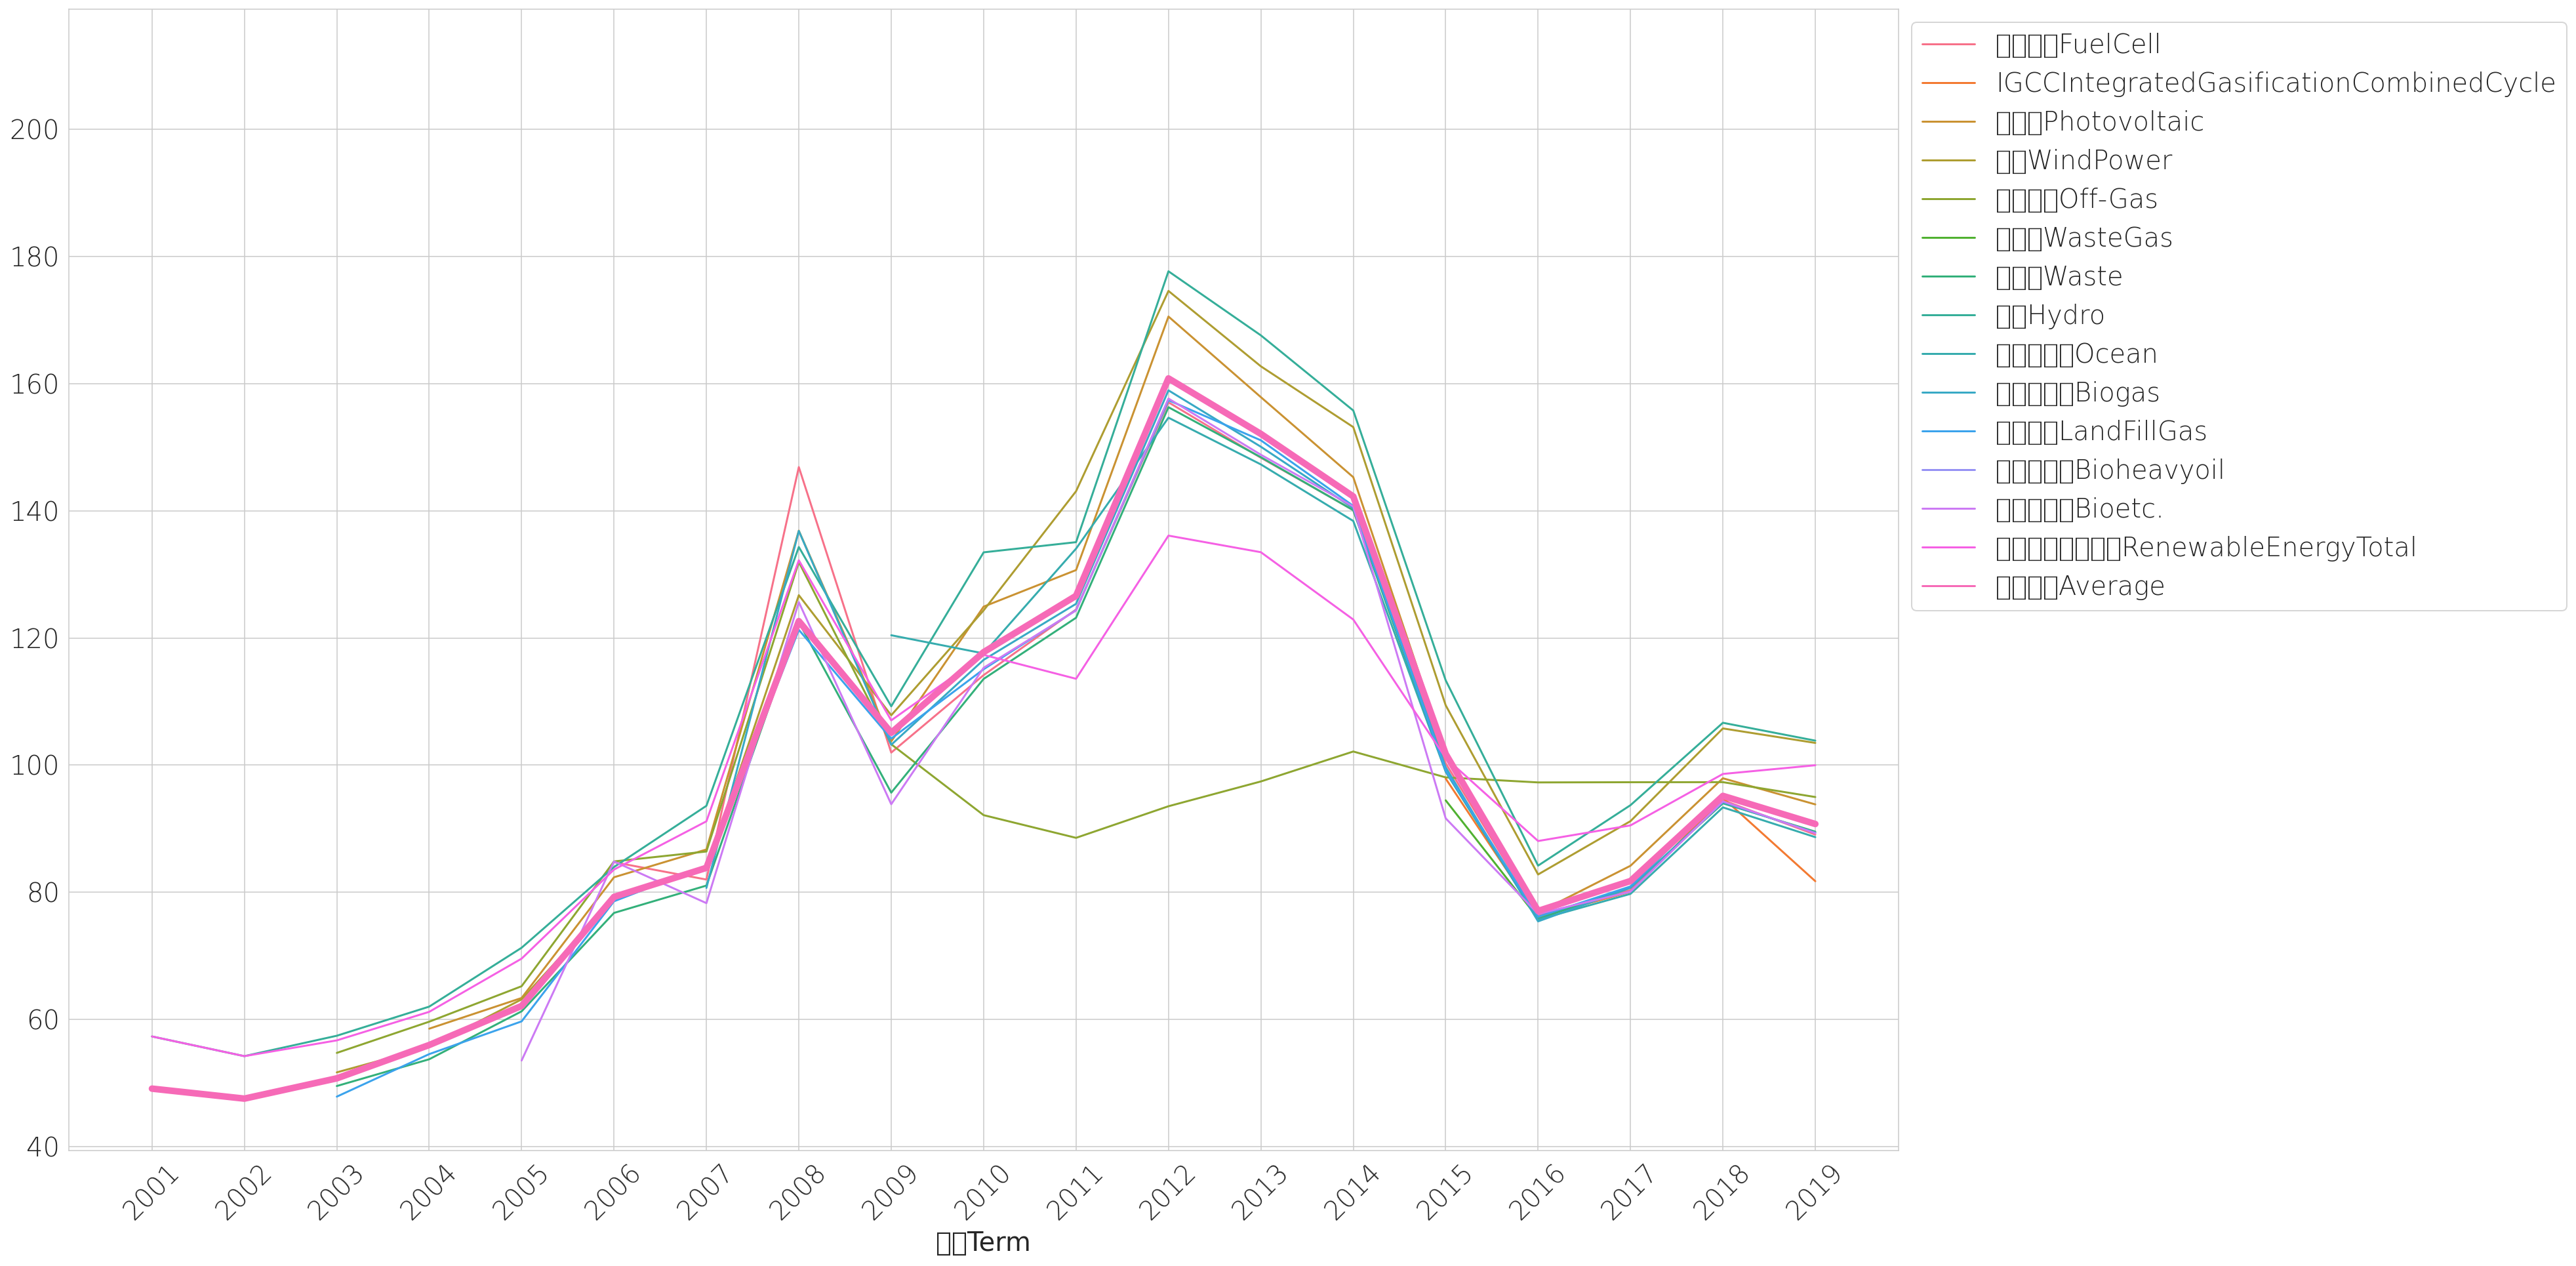

In [136]:
plt.figure(figsize=(25, 16))
plt.xticks(rotation=45)
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["font.weight"] = 9
sns.set_style("whitegrid")
ax=sns.lineplot(data=UPS)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for idx, l in enumerate(ax.lines):
  l.set_linestyle("-")
  # if idx == len(ax.lines)-1:
    
  #  print("setting line width to 10")
  #  l.set_linewidth(10)
#ax.set_title("SMP and unit price [Won/kWh]")
#ax.legend(["SMP", "Nuclear", "Coal", "LNG", "Renewable"])
#ax.lines[0].set_linewidth(4)
#ax.lines[14].set_linestyle(":")
#ax.lines[14].set_color("black")
ax.lines[14].set_linewidth(5)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize=15, loc=2, prop={'size': 20})
plt.show()

# 도별 시각화

In [137]:
!pip3 install mapclassify

In [138]:
!pip3 install geopandas

     |████████████████████████████████| 994 kB 858 kB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 1.0 MB/s eta 0:00:01


In [8]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
shapefile=os.path.join(path, "gadm36_KOR_shp", "gadm36_KOR_1.shp")

In [10]:
gdf=gpd.read_file(shapefile)[["NAME_1", 'geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ..."
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671..."
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204..."
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ..."
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094..."
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ..."
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ..."
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ..."


<AxesSubplot:>

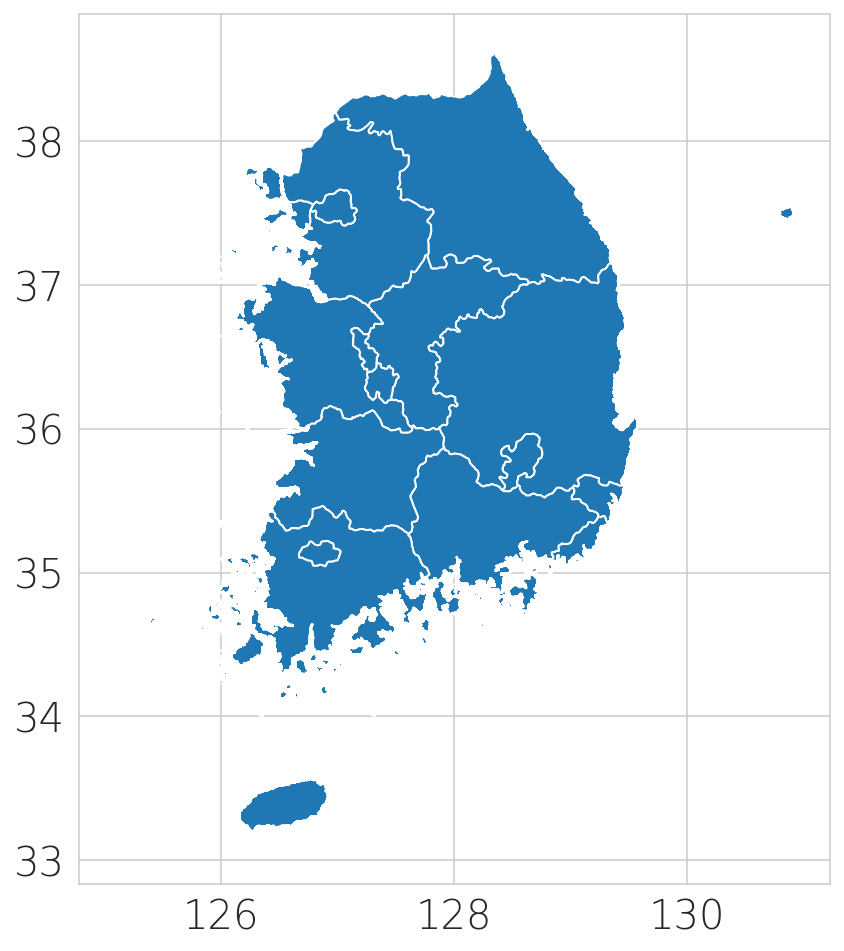

In [143]:
gdf.plot(figsize=(10,8))

In [144]:
list(gdf['name']) #17개

['Busan',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Daegu',
 'Daejeon',
 'Gangwon-do',
 'Gwangju',
 'Gyeonggi-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Incheon',
 'Jeju',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Sejong',
 'Seoul',
 'Ulsan']

In [11]:
files=glob("./csv_table/*신재생거래량.csv")

In [12]:
files=sorted(files)

In [13]:
files

['./csv_table/112_2019-1신재생거래량.csv',
 './csv_table/113_2019-1신재생거래량.csv',
 './csv_table/114_2019-2신재생거래량.csv',
 './csv_table/115_2019-2신재생거래량.csv',
 './csv_table/116_2019-3신재생거래량.csv',
 './csv_table/117_2019-3신재생거래량.csv',
 './csv_table/118_2019-4신재생거래량.csv',
 './csv_table/119_2019-4신재생거래량.csv',
 './csv_table/120_2019-5신재생거래량.csv',
 './csv_table/121_2019-5신재생거래량.csv',
 './csv_table/122_2019-6신재생거래량.csv',
 './csv_table/123_2019-6신재생거래량.csv',
 './csv_table/124_2019-7신재생거래량.csv',
 './csv_table/125_2019-7신재생거래량.csv',
 './csv_table/126_2019-8신재생거래량.csv',
 './csv_table/127_2019-8신재생거래량.csv',
 './csv_table/128_2019-9신재생거래량.csv',
 './csv_table/129_2019-9신재생거래량.csv',
 './csv_table/130_2019-10신재생거래량.csv',
 './csv_table/131_2019-10신재생거래량.csv',
 './csv_table/132_2019-11신재생거래량.csv',
 './csv_table/133_2019-11신재생거래량.csv',
 './csv_table/134_2019-12신재생거래량.csv',
 './csv_table/135_2019-12신재생거래량.csv']

In [14]:
renewdict={}
for f in files:
    renewdict[f.split('/')[-1][:11]]=pd.read_csv(f)

In [15]:
renewdict.keys()

dict_keys(['112_2019-1신', '113_2019-1신', '114_2019-2신', '115_2019-2신', '116_2019-3신', '117_2019-3신', '118_2019-4신', '119_2019-4신', '120_2019-5신', '121_2019-5신', '122_2019-6신', '123_2019-6신', '124_2019-7신', '125_2019-7신', '126_2019-8신', '127_2019-8신', '128_2019-9신', '129_2019-9신', '130_2019-10', '131_2019-10', '132_2019-11', '133_2019-11', '134_2019-12', '135_2019-12'])

In [16]:
lst=list(renewdict.keys())
for idx, df_key in enumerate(lst):
    if idx%2==0:
        df1=renewdict[df_key]
    elif idx%2==1:
        renewdict[str(int((idx+1)/2))]=renewdict[df_key].merge(df1, how='outer', on='구분Type')
        renewdict[str(int((idx+1)/2))]=renewdict[str(int((idx+1)/2))].set_index("구분Type")
        print(str(int((idx+1)/2)))

1
2
3
4
5
6
7
8
9
10
11
12


In [17]:
renewdict["1"]

,서울Seoul,인천Incheon,대전Daejeon,광주Gwangju,대구Daegu,세종Sejong,울산Ulsan,부산Busan,전국Total,경기Gyeonggi,강원Gangwon,경남Gyeongnam,경북Gyeongbuk,전남Jeonnam,전북Jeonbuk,충남Chungnam,충북Chungbuk,제주Jeju
구분Type,,,,,,,,,,,,,,,,,,
연료전지,25781,35483,-,-,3529,-,1146,22412,184074,72925,-,-,350,16637,-,5811,-,-
IGCC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
태양광,1224,2219,900,3852,3180,642,1474,5169,253346,10836,21411,20683,34300,70654,18712,31751,11029,15310
풍력,-,5364,-,-,-,-,145,4,346385,545,84248,9250,107739,59242,1908,169,-,77771
수력,-,3829,-,737,220,-,197,-,200360,36127,47594,17372,13814,5215,9189,6719,59132,219
해양에너지,-,-,-,-,-,-,-,-,38843,38843,-,-,-,-,-,-,-,-
바이오가스,2793,-,-,-,1866,-,-,-,36952,2684,18580,359,463,68,8997,385,551,207
매립가스,-,22864,-,164,-,-,-,678,24507,-,-,-,-,429,-,-,117,254
바이오기타,-,4110,-,-,-,264,-,-,208632,20123,69659,319,-,-,26025,87302,-,830


In [19]:
renewdict["1"].columns

Index(['서울Seoul', '인천Incheon', '대전Daejeon', '광주Gwangju', '대구Daegu', '세종Sejong',
       '울산Ulsan', '부산Busan', '전국Total', '경기Gyeonggi', '강원Gangwon',
       '경남Gyeongnam', '경북Gyeongbuk', '전남Jeonnam', '전북Jeonbuk', '충남Chungnam',
       '충북Chungbuk', '제주Jeju'],
      dtype='object')

In [20]:
renewdict['2'].columns

Index(['서울Seoul', '인천Incheon', '대전Daejeon', '광주Gwangju', '대구Daegu', '세종Sejong',
       '울산Ulsan', '부산Busan', '전국Total', '경기Gyeonggi', '강원Gangwon',
       '경남Gyeongnam', '경북Gyeongbuk', '전남Jeonnam', '전북Jeonbuk', '충남Chungnam',
       '충북Chungbuk', '제주Jeju'],
      dtype='object')

In [18]:
newcol=['Seoul', 'Incheon', 'Daejeon', 'Gwangju', 'Daegu', 'Sejong', 'Ulsan', 'Busan', 'Gyeonggi-do', 'Gangwon-do', 'Gyeongsangnam-do', 'Gyeongsangbuk-do', 'Jeollanam-do', 'Jeollabuk-do', 'Chungcheongnam-do', 'Chungcheongbuk-do', 'Jeju'] #Total will be erased
for i in range(1, 13):
    renewdict[str(i)]=renewdict[str(i)].drop(columns=['전국Total'])
    renewdict[str(i)].columns=newcol
    renewdict[str(i)]=renewdict[str(i)].replace('-', 0)
    # print(renewdict[str(i)].columns)

In [19]:
gdf=gpd.read_file(shapefile)[["NAME_1", 'geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ..."
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671..."
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204..."
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ..."
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094..."
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ..."
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ..."
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ..."


In [20]:
for i in range(1,13):
    data={'data'+str(i):list(renewdict[str(i)].iloc[3+2:4+2, :].T['해양에너지']), 'name':['Seoul', 'Incheon', 'Daejeon', 'Gwangju', 'Daegu', 'Sejong', 'Ulsan',
       'Busan', 'Gyeonggi-do', 'Gangwon-do', 'Gyeongsangnam-do',
       'Gyeongsangbuk-do', 'Jeollanam-do', 'Jeollabuk-do', 'Chungcheongnam-do',
       'Chungcheongbuk-do', 'Jeju']}
    df=pd.DataFrame(data)
    gdf=gdf.merge(df, on='name', how='outer')
gdf

,name,geometry,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",0,0,0,0,0,0,0,0,0,0,0,0
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199...",0,0,0,0,0,0,0,0,0,0,0,0
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ...",0,0,0,0,0,0,0,0,0,0,0,0
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671...",0,0,0,0,0,0,0,0,0,0,0,0
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204...",0,0,0,0,0,0,0,0,0,0,0,0
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ...",0,0,0,0,0,0,0,0,0,0,0,0
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094...",0,0,0,0,0,0,0,0,0,0,0,0
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ...",38843,38572,39569,38813,38921,36641,38015,41774,41577,43471,39107,39024
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ...",0,0,0,0,0,0,0,0,0,0,0,0
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ...",0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(300,700),sharex=True, sharey=True, )
# plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize=15, loc=2, prop={'size': 10})

for idx, ax in enumerate(axes.flat):
    gdf.plot(ax=ax, column='data'+str(idx+1), legend=True,legend_kwds={'loc':'lower right'}, cmap="OrRd", scheme="quantiles")
plt.savefig("wind.jpg")